# Carga de librerías


In [1]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) #Ignorar error de clase o versión

import numpy as np
import pandas as pd 
import seaborn as sns
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans


from sklearn import linear_model
from sklearn import tree

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import decimal
import sklearn
import yellowbrick


from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.features import PCA
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

%matplotlib inline

In [2]:
print("Ingresa el nombre del archivo a leer con extensión .txt")
archivo = input()
#SI.txt
#data385Attrib.txt

Ingresa el nombre del archivo a leer con extensión .txt


 SI.txt


# Carga de datos

In [3]:
df = pd.read_csv(archivo, sep=" ", header=None, names=["a", "b", "c"])
Elem = df["a"][0]
Attr = df["a"][1]
NumClas = df["a"][2]
print("Número de Elementos: ")
print(Elem)
print("Número de Atributos: ")
print(Attr)
print("Número de Clases: ")
print(NumClas)


Número de Elementos: 
420
Número de Atributos: 
19
Número de Clases: 
7


In [4]:
df2 = pd.read_table(archivo, header = None, sep = ",",skiprows = 3)
df2

#Saltar los renglones
#cd = pd.read_csv(archivo,skiprows = lambda x: x<3, names = columns)

0    1   2    3         4         5         6         7         8   \
0    140  125   0  0.0  0.000000  0.277778  0.062963  0.666667  0.311111   
1    188  133   0  0.0  0.000000  0.333333  0.266667  0.500000  0.077778   
2    105  139   0  0.0  0.000000  0.277778  0.107407  0.833333  0.522222   
3     34  137   0  0.0  0.000000  0.500000  0.166667  1.111111  0.474074   
4     39  111   0  0.0  0.000000  0.722222  0.374074  0.888889  0.429629   
..   ...  ...  ..  ...       ...       ...       ...       ...       ...   
415  225   58   0  0.0  0.000000  0.333334  0.421637  0.444444  0.344265   
416  170  154   0  0.0  0.000000  0.111111  0.172133  0.055556  0.136083   
417  238   61   0  0.0  0.000000  0.666667  0.471405  0.722222  0.490653   
418  189   62   0  0.0  0.000000  0.388889  0.250924  0.444444  0.344265   
419  242   57   0  0.0  0.111111  2.444444  2.353877  9.277778  2.760166   

            9          10         11         12         13         14  \
0     6.185185   7.333334   7.666666   3.555556   3.444444   4.444445   
1     6.666666   8.333334   7.777778   3.888889   5.000000   3.333333   
2     6.111111   7.555555   7.222222   3.555556   4.333334   3.333333   
3     5.851852   7.777778   6.444445   3.333333   5.777778   1.777778   
4     6.037037   7.000000   7.666666   3.444444   2.888889   4.888889   
..         ...        ...        ...        ...        ...        ...   
415   8.333333   5.555555  14.111111   5.333334  -8.333333  17.333334   
416   0.074074   0.000000   0.222222   0.000000  -0.222222   0.444444   
417   8.777778   5.888889  14.333333   6.111111  -8.666667  16.666666   
418   7.629630   5.000000  13.111111   4.777778  -7.888889  16.444445   
419  15.370370  11.333333  20.888890  13.888889 -12.111111  16.555555   

           15         16        17        18  19  
0   -7.888889   7.777778  0.545635 -1.121818   0  
1   -8.333333   8.444445  0.538580 -0.924817   0  
2   -7.666666   7.555555  0.532628 -0.965946   0  
3   -7.555555   7.777778  0.573633 -0.744272   0  
4   -7.777778   7.888889  0.562919 -1.175773   0  
..        ...        ...       ...       ...  ..  
415 -9.000000  14.111111  0.622222 -2.068564   6  
416 -0.222222   0.222222  0.222222 -2.094395   6  
417 -8.000000  14.333333  0.588823 -2.121837   6  
418 -8.555555  13.111111  0.635938 -2.066953   6  
419 -4.444445  20.888890  0.466308 -2.370613   6  

[420 rows x 20 columns]

In [5]:
numAttri = len(df2.columns) #o =Attr
print("Número de Atributos:")
numAttri1 = numAttri-1
print(numAttri1)
numclas = NumClas

Número de Atributos:
19


In [6]:
# la sub-matriz X contiene los datos de las primeras X columnas del dataframe y todas las filas
X2 = df2.iloc[:, 0:numAttri1].values

# El vector y contiene los valores de las X columnas (Grupos de datos)para todas las filas
y2 = df2.iloc[:, numAttri1].values

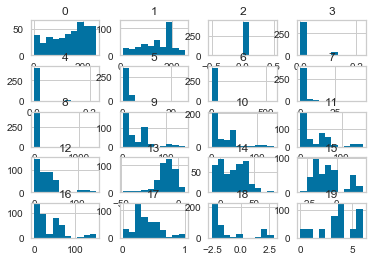

In [7]:
df2.hist()

plt.show()

# Análisis de Datos

In [8]:
print("Información del Conjunto de Datos")
print(df2.info())

Información del Conjunto de Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       420 non-null    int64  
 1   1       420 non-null    int64  
 2   2       420 non-null    int64  
 3   3       420 non-null    float64
 4   4       420 non-null    float64
 5   5       420 non-null    float64
 6   6       420 non-null    float64
 7   7       420 non-null    float64
 8   8       420 non-null    float64
 9   9       420 non-null    float64
 10  10      420 non-null    float64
 11  11      420 non-null    float64
 12  12      420 non-null    float64
 13  13      420 non-null    float64
 14  14      420 non-null    float64
 15  15      420 non-null    float64
 16  16      420 non-null    float64
 17  17      420 non-null    float64
 18  18      420 non-null    float64
 19  19      420 non-null    int64  
dtypes: float64(16), int64(4)
memory usage: 65.

In [9]:
print("Descripción del Conjunto de Datos:")
print(df2.describe())

Descripción del Conjunto de Datos:
               0           1      2           3           4           5   \
count  420.000000  420.000000  420.0  420.000000  420.000000  420.000000   
mean   144.245238  142.345238    0.0    0.011905    0.005820    1.756878   
std     73.219449   60.798955    0.0    0.035253    0.029154    2.381124   
min      1.000000   11.000000    0.0    0.000000    0.000000    0.000000   
25%     85.000000   92.500000    0.0    0.000000    0.000000    0.666668   
50%    160.000000  152.000000    0.0    0.000000    0.000000    1.333334   
75%    205.000000  190.000000    0.0    0.000000    0.000000    2.166667   
max    253.000000  251.000000    0.0    0.222222    0.222222   25.500000   

               6           7            8           9           10  \
count  420.000000  420.000000   420.000000  420.000000  420.000000   
mean     3.465178    2.357937     6.538579   30.833069   27.335979   
std     30.810966    3.651203    68.978325   31.442611   28.866983   


In [10]:
#Número de Atributos
numAttri = len(df2.columns)

In [11]:
print("Distribución de atributos:")
print(df2.groupby(df2.iloc[:, numAttri1].values).size())

Distribución de atributos:
0     30
1     30
2     30
3     78
4    119
5     30
6    103
dtype: int64


In [30]:
number_of_colors = 50

color1 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

# División de la matriz del Conjunto de Datos en 2 partes


In [12]:
# la sub-matriz X contiene los datos de las primeras NumAtri-1 columnas del dataframe y todas las filas
X1 = df2.iloc[:, 0:numAttri1].values

# El vector y contiene los valores de las NumAtri-1 columnas (Grupos de datos)para todas las filas
y1 = df2.iloc[:, numAttri1].values

In [28]:
X1 = StandardScaler().fit_transform(X1)

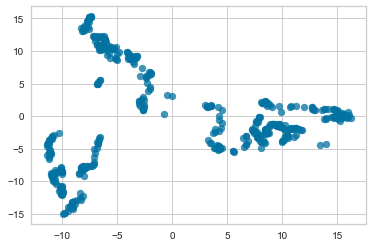

In [29]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X1)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf['principal component 1'])
X1 = principalDf['principal component 1']


In [30]:
finalDf = pd.concat([principalDf, df2[[numAttri1]]], axis = 1)


NameError: name 'finalDf' is not defined

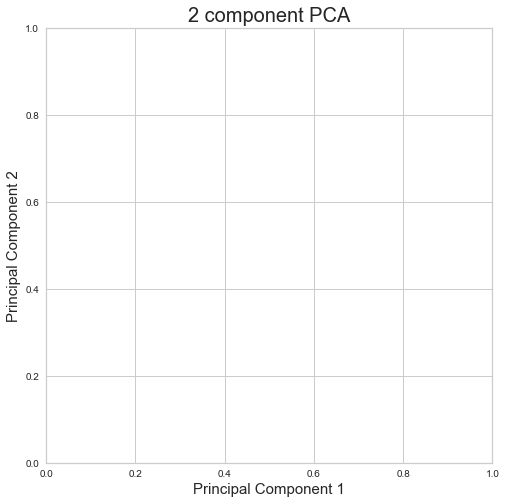

In [26]:


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = range(0, int(NumClas))
colors = ['r', 'g', 'b']
for target, color in zip(targets,color1):
    indicesToKeep = finalDf[numAttri1] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



# Datos en las matrices


In [13]:
print("Conjunto de elementos")
print(X1)

print("\nClases")
print(y1)

Conjunto de elementos
[[140.         125.           0.         ...   7.7777777    0.5456349
   -1.1218182 ]
 [188.         133.           0.         ...   8.444445     0.53858024
   -0.92481726]
 [105.         139.           0.         ...   7.5555553    0.5326279
   -0.96594584]
 ...
 [238.          61.           0.         ...  14.333333     0.5888227
   -2.1218371 ]
 [189.          62.           0.         ...  13.111111     0.6359381
   -2.0669532 ]
 [242.          57.           0.         ...  20.88889      0.46630767
   -2.3706133 ]]

Clases
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

# Normalización


In [14]:
#Apliqué una transformación de los datos para poder aplicar la distribución normal
X_std = StandardScaler().fit_transform(X1)

# Cálculo de autovectores y autovalores.

In [15]:
# Calculé la matriz de covarianza
print("NumPy Matriz de covarianza: \n%s"
      %np.cov(X_std.T))

NumPy Matriz de covarianza: 
[[ 1.00238663 -0.00517655  0.         -0.09000882 -0.00527915 -0.07761408
  -0.08324898 -0.10555245 -0.06898446 -0.04813542 -0.05291044 -0.02840126
  -0.06719666 -0.00450509  0.07792637 -0.11326005 -0.04189296 -0.09883005
  -0.12819719]
 [-0.00517655  1.00238663  0.          0.23891706  0.01220751  0.04390118
  -0.05785436  0.08021026 -0.04556318 -0.20818285 -0.20693508 -0.22851966
  -0.18107766  0.18597578 -0.29217723  0.29756008 -0.19260387 -0.0982089
   0.52182882]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.09000882  0.23891706  0.          1.00238663  0.04721002  0.00632074
  -0.02091117  0.01652921 -0.02277823  0.03103135  0.03174881  0.01749016
   0.04665142 -0.0192451  -0.05511378  0.09696486  0.03424307 -0.02753345
   0.19669682]
 [-0.00527915  0.01220751  0.          0.0472100

In [16]:
# Valor propio y Vector Propio de la matriz
covMat = np.cov(X_std.T)

propiVal, propiVec = np.linalg.eig(covMat)

In [17]:
print("Vectores propios \n%s" %propiVec)

print("\nValores propios \n%s" %propiVal)

Vectores propios 
[[-1.50400773e-03  8.18822224e-02  1.86509609e-01  5.87474198e-01
   4.86280456e-01  2.08417501e-01  5.46599353e-01  8.43500430e-02
   1.03777771e-01  6.40966938e-02 -1.03521101e-01 -4.07341826e-02
   1.82988662e-02  1.74644110e-05 -6.41882416e-10  3.33040599e-09
   2.20850876e-09  1.44346353e-09  0.00000000e+00]
 [-1.05147984e-01 -4.99508107e-02 -4.35383517e-01  4.03841947e-01
  -2.87511415e-02  3.57361708e-02 -2.51567012e-01  5.20517946e-01
  -4.85477385e-01 -7.60705598e-02 -1.13826656e-01  2.07097414e-01
  -3.71250333e-03  1.17663412e-02  1.87255135e-09 -8.77639261e-09
   4.08456005e-09  2.60937279e-10  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-6.11001000e-03 -8.25849576e-03 -3.

In [18]:
#  Hice una lista de parejas (Vector Propio, Valor Propio) 
propiPares = [(np.abs(
                propiVal[i]),
                propiVec[:, i])
                for i in range(len(propiVal)
             )]

propiPares.sort(key = lambda x: x[0], reverse = True)

In [19]:
# Muestro la lista de autovalores en orden Descendente
print("Autovalores en orden descendente: ")
for i in propiPares:
    print(i[0])

Autovalores en orden descendente: 
7.4664454596338246
2.988640996720376
1.918781910553198
1.13303508945293
1.0440995975844052
0.8489187121083646
0.7581758122454765
0.6922079488004307
0.5002248619420574
0.3444461275193996
0.22120116881796997
0.08489262007082404
0.04132538898348199
0.0005637327749220163
3.928112131810498e-15
3.031535052614494e-15
2.0939854128801438e-15
4.5800129839771356e-17
0.0


# Seleccioné los Vectores Propios correspondientes a las componentes principales


ValueError: Invalid RGBA argument: '#0151AD758'

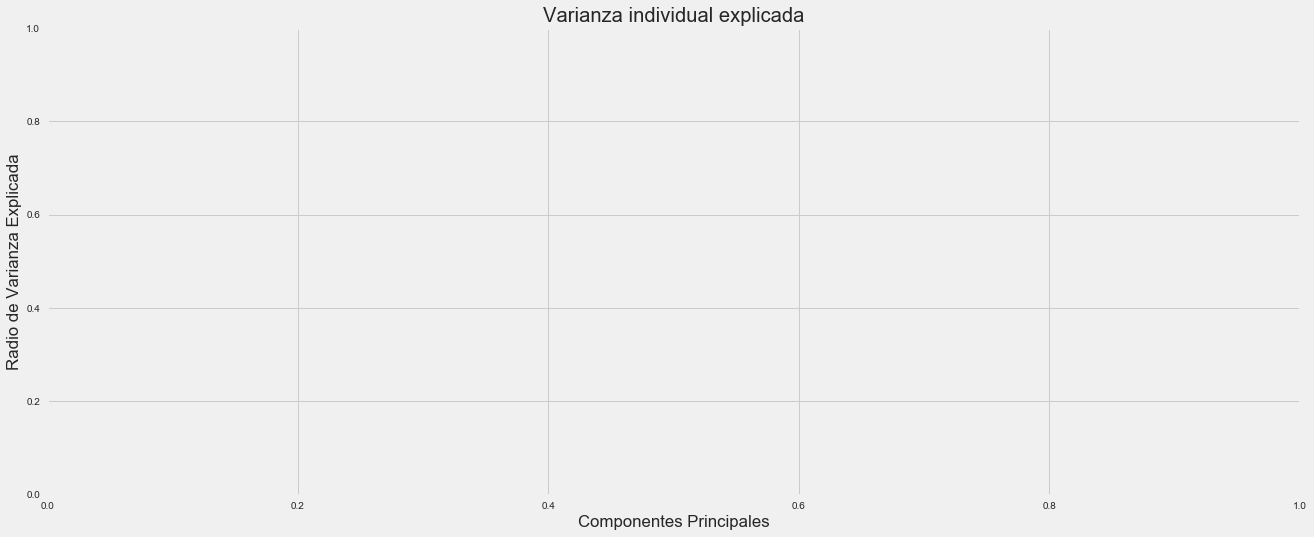

In [29]:
# Valores Propios, calculé la varianza explicada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cumVarExp = np.cumsum(varExp)

# Varianza explicada por cada Valor Propio, y la acumulada
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(20, 8))    
    #plt.figure(figsize=(numAttri1, 8))
    plt.xlabel("Componentes Principales")
    plt.ylabel("Radio de Varianza Explicada")
    plt.title("Varianza individual explicada")
    plt.bar(range(numAttri1), varExp, align = "center", color = color1, ecolor = "black")


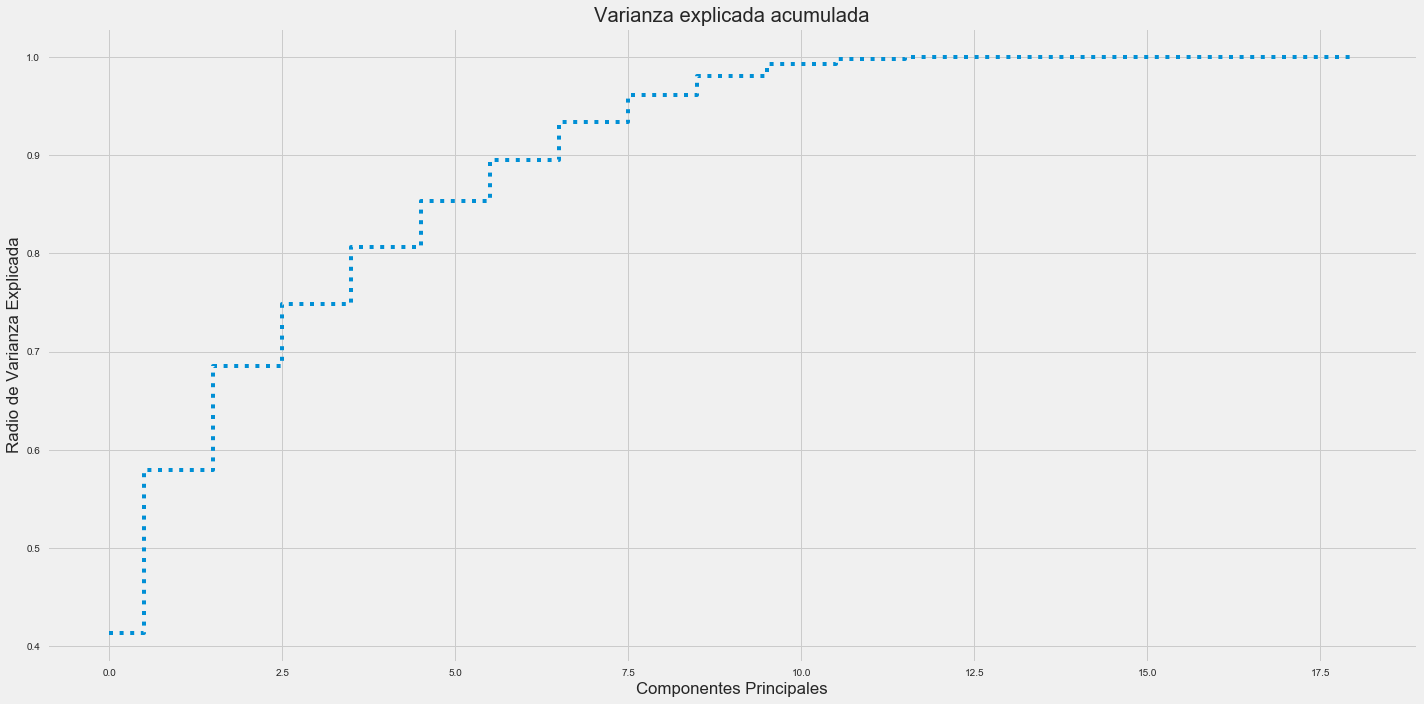

In [23]:
# Varianza explicada por cada Valor Propio, y la acumulada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cum_var_exp = np.cumsum(varExp)

# Varianza explicada por cada autovalor, y la acumulada
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize = (20, 10))   
#    plt.figure(figsize = (numAttri1, 10))
    #plt.show()
    
    plt.step(range(numAttri1), cum_var_exp, where = "mid", linestyle = ":")
    plt.ylabel("Radio de Varianza Explicada")
    plt.xlabel("Componentes Principales")
    plt.title("Varianza explicada acumulada")
    plt.tight_layout()

# Datos Puros.


In [24]:
#Generé la matríz a partir de los pares Vector Propio y un Vector Propio
matriz_PCA = np.hstack((propiPares[0][1].reshape(numAttri1, 1),
                        propiPares[1][1].reshape(numAttri1, 1)
                       ))

#print("Matriz PCA:\n", matriz_PCA)

Y = X_std.dot(matriz_PCA)

# Datos sobre un espacio de dimensionalidad 2.

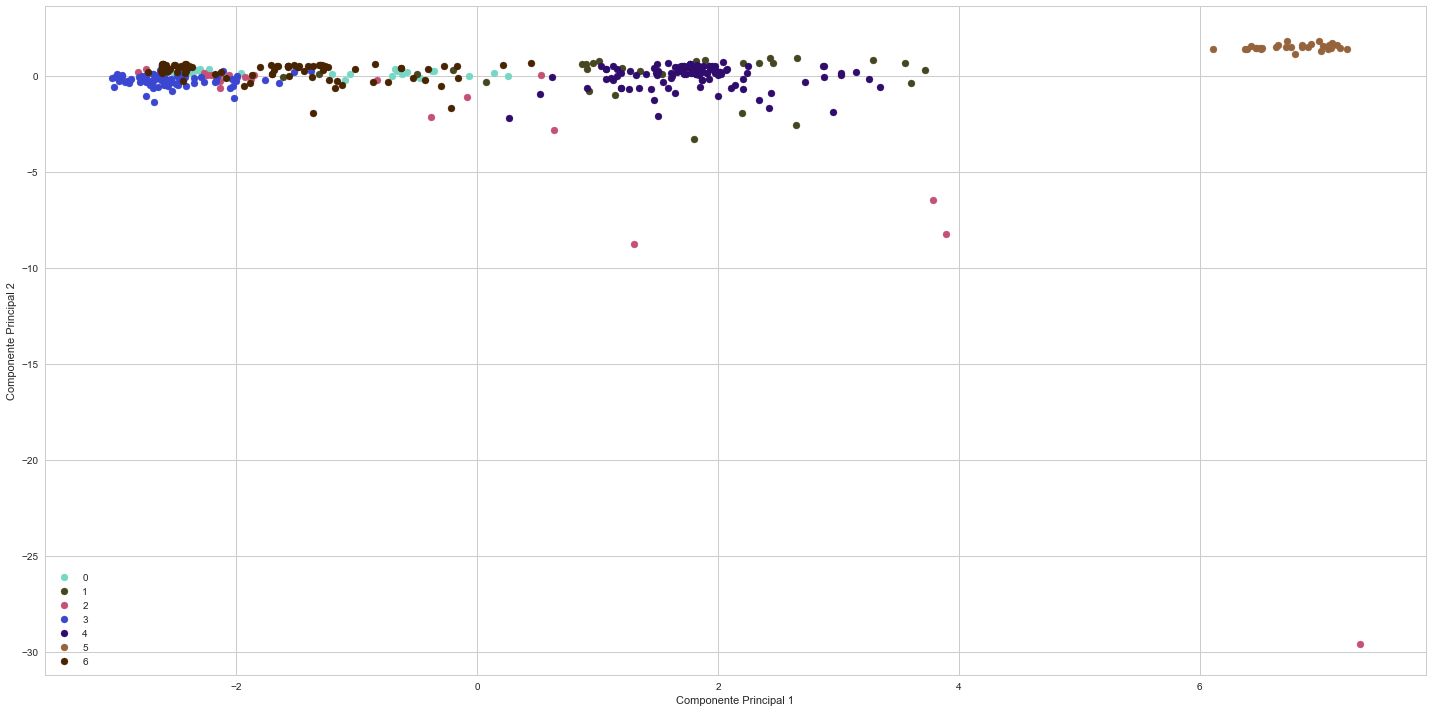

In [25]:
wrange = range(0, int(NumClas))
with plt.style.context("seaborn-whitegrid"):
    plt.figure(figsize=(20,10))    
#    plt.figure(figsize=(numAttri1,10))
    for eti, colu in zip((wrange), color1):
        plt.scatter(Y[y2 == eti, 0],
                    Y[y2 == eti, 1],
                    c = colu,
                    label = eti)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(loc = "lower left")
    plt.tight_layout()
    plt.show()

# Datos Escalados

In [ ]:
#Generé la matríz a partir de los pares Vector Propio y un Vector Propio
scaler = MinMaxScaler() 

matriz_PCA = np.hstack((propiPares[0][1].reshape(numAttri1, 1),
                        propiPares[1][1].reshape(numAttri1, 1)
                       ))

Y = X_std.dot(scaler.fit_transform(matriz_PCA))
print(Y)

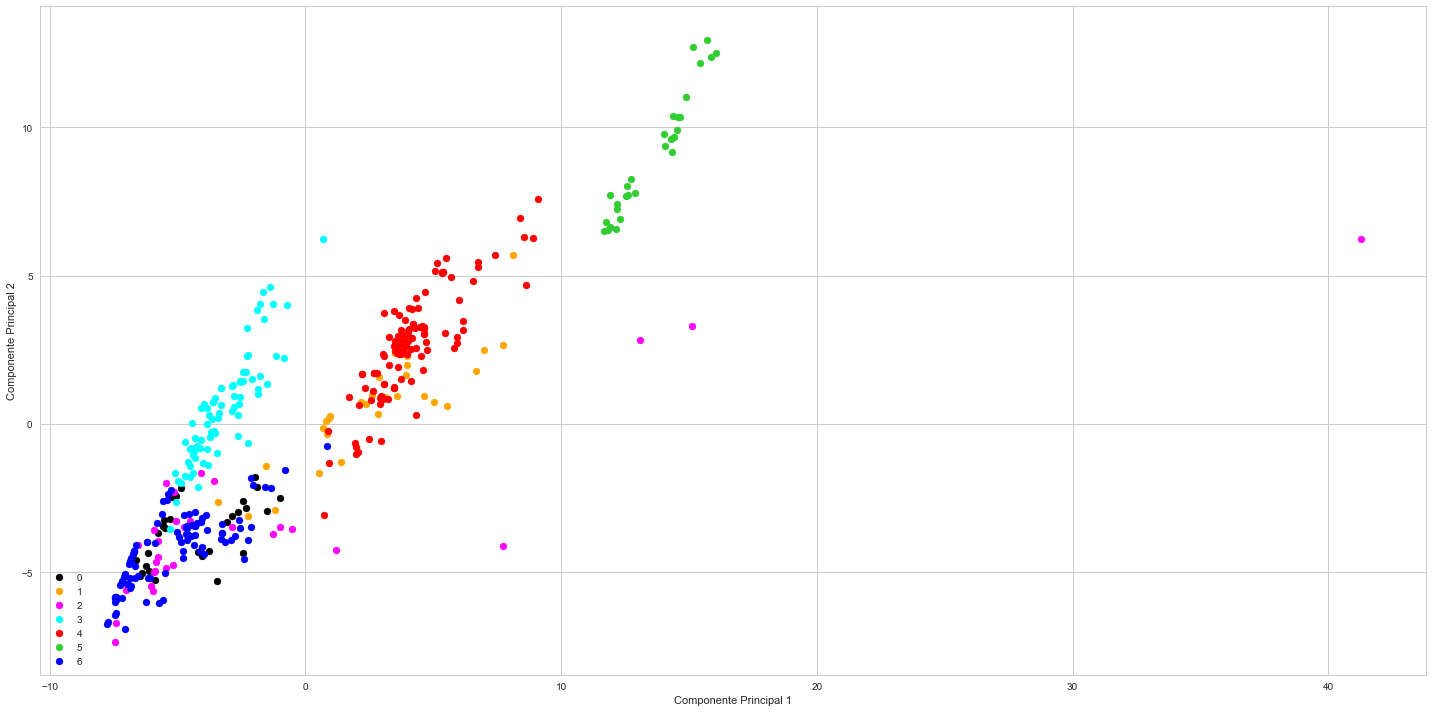

In [25]:
xrange = range(0, int(NumClas))

with plt.style.context("seaborn-whitegrid"):
    plt.figure(figsize=(20,10))    
#    plt.figure(figsize=(numAttri1,10))
    for eti, colu in zip((xrange), color1):
        plt.scatter(Y[y2 == eti, 0],
                    Y[y2 == eti, 1],
                    c = colu,
                    label = eti)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(loc = "lower left")
    plt.tight_layout()
    plt.show()

In [26]:
#FUNCIONES EXTRA

C:\Users\afb19\anaconda3\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


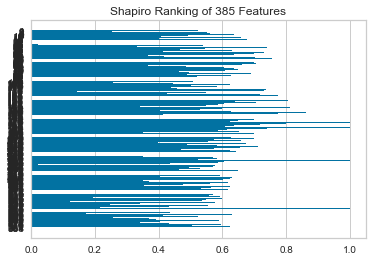

C:\Users\afb19\anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\afb19\anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


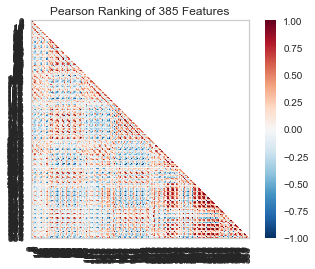

In [31]:
# Specify the target classes
visualizer = Rank1D(algorithm = "shapiro")

visualizer.fit(X1, y1)           # Ajustar los datos al visualizador
visualizer.transform(X1)        # Transforma los datos
visualizer.show() 

visualizer = Rank2D(algorithm = "pearson")

visualizer.fit(X1, y1)           # Ajustar los datos al visualizador
visualizer.transform(X1)        # Transforma los datos
visualizer.show() 

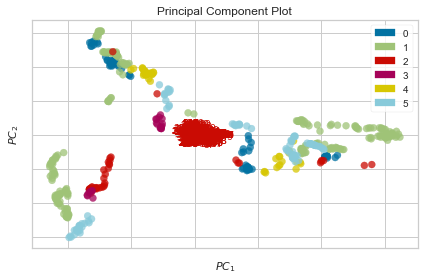

In [32]:
visualizer = PCA(scale = True, proj_features=True)
visualizer.fit_transform(X1, y1)
visualizer.show()

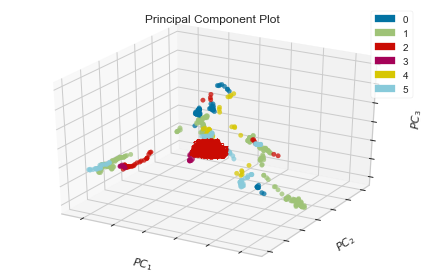

In [33]:
visualizer = PCA(scale = True, proj_features = True, projection = 3)
visualizer.fit_transform(X1, y1)
visualizer.show()

K-Medias


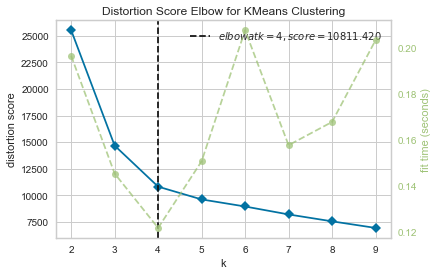

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001168F830048>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [34]:
print("K-Medias")
kelbow_visualizer(KMeans(random_state = 4), X1, k = (2,10))

In [35]:
print("Número de grupos")
numGr = input()
numGr = int(numGr)
#7

Número de grupos


 7


Mapas de distancia intercluster


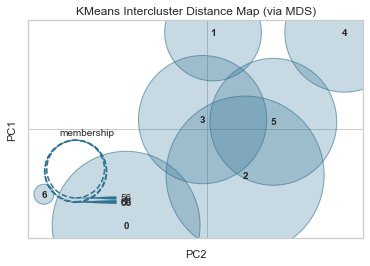

In [36]:
# Instanciar el modelo de agrupamiento y el visualizador
model = KMeans(numGr)
visualizer = InterclusterDistance(model)

print("Mapas de distancia intercluster")
visualizer.fit(X1)        # Ajustar los datos al visualizador
visualizer.show()        # Finaliza y renderiza la figura

C:\Users\afb19\anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


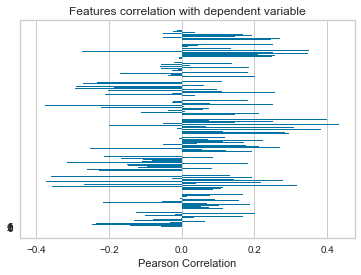

In [37]:
X = df2.iloc[:, 0:numAttri1].values
y = df2.iloc[:, numAttri1].values

# Crear una lista de los nombres de las funciones
features = range(0, int(NumClas))

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels = features)

visualizer.fit(X, y)        # Ajustar los datos al visualizador
visualizer.show()  

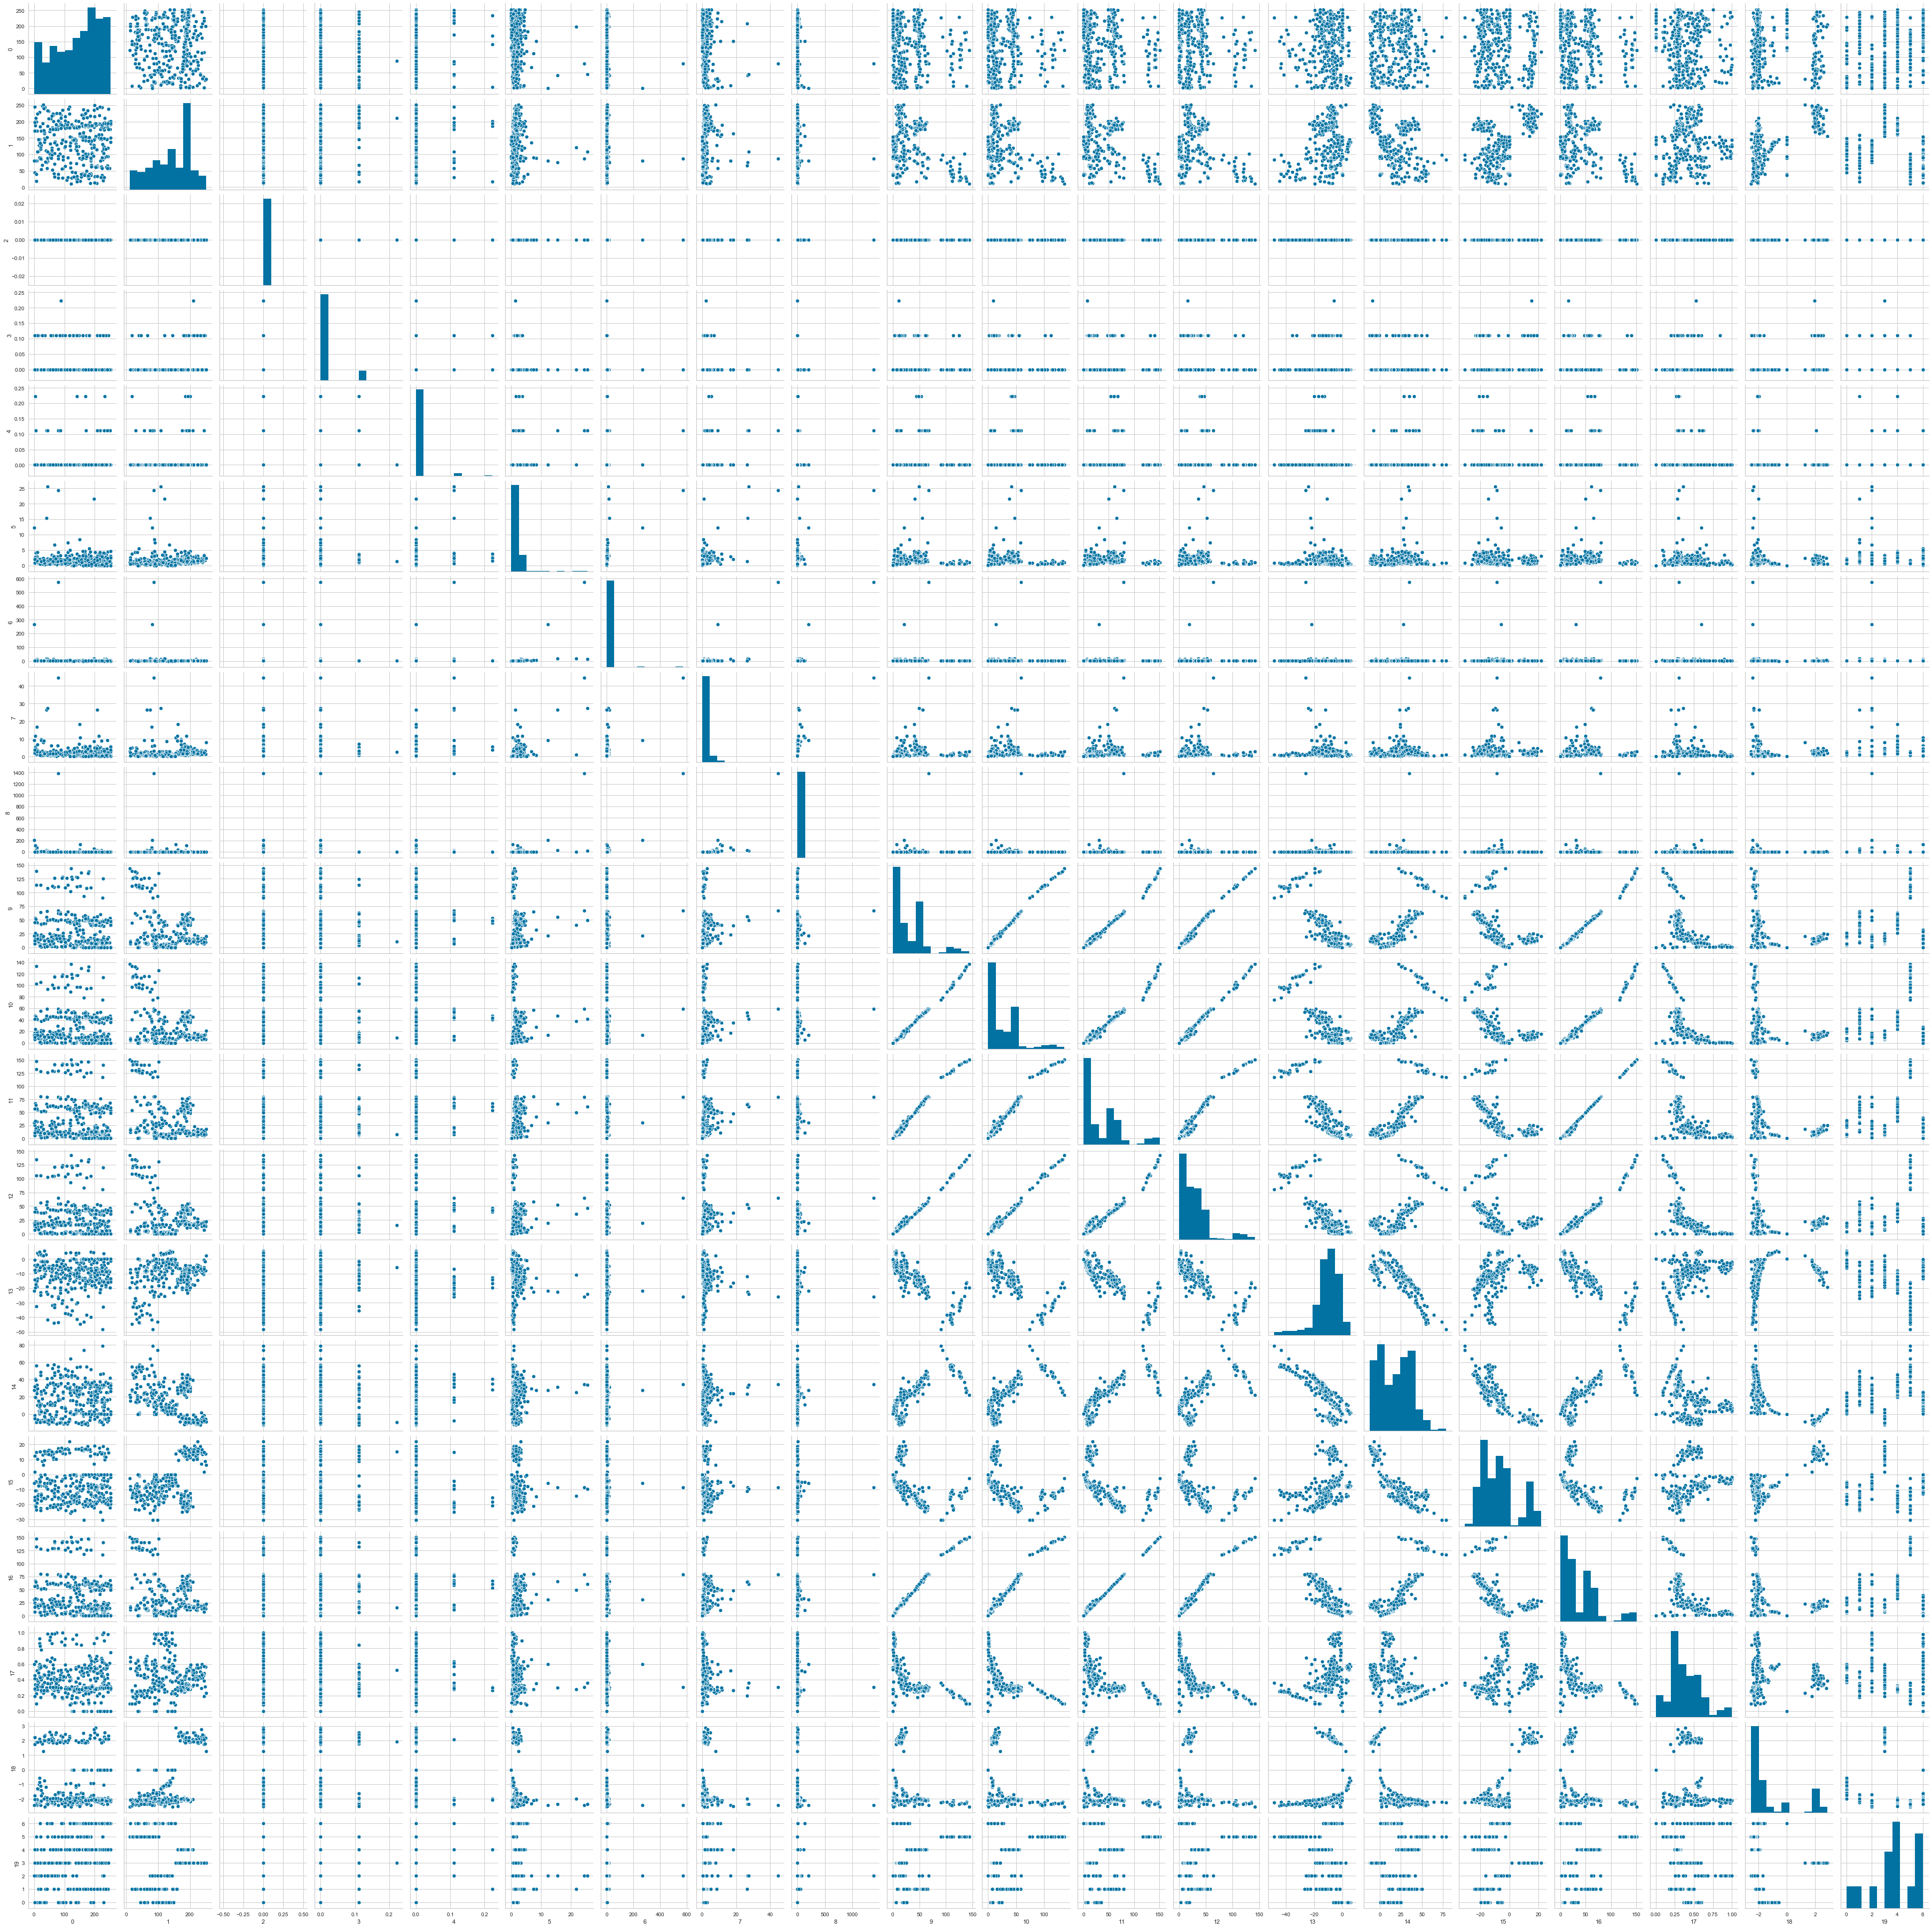

In [34]:
#gráfico donde se puedan observar las relaciones entre variables y sus histogramas

sns.pairplot(df2)
plt.show()

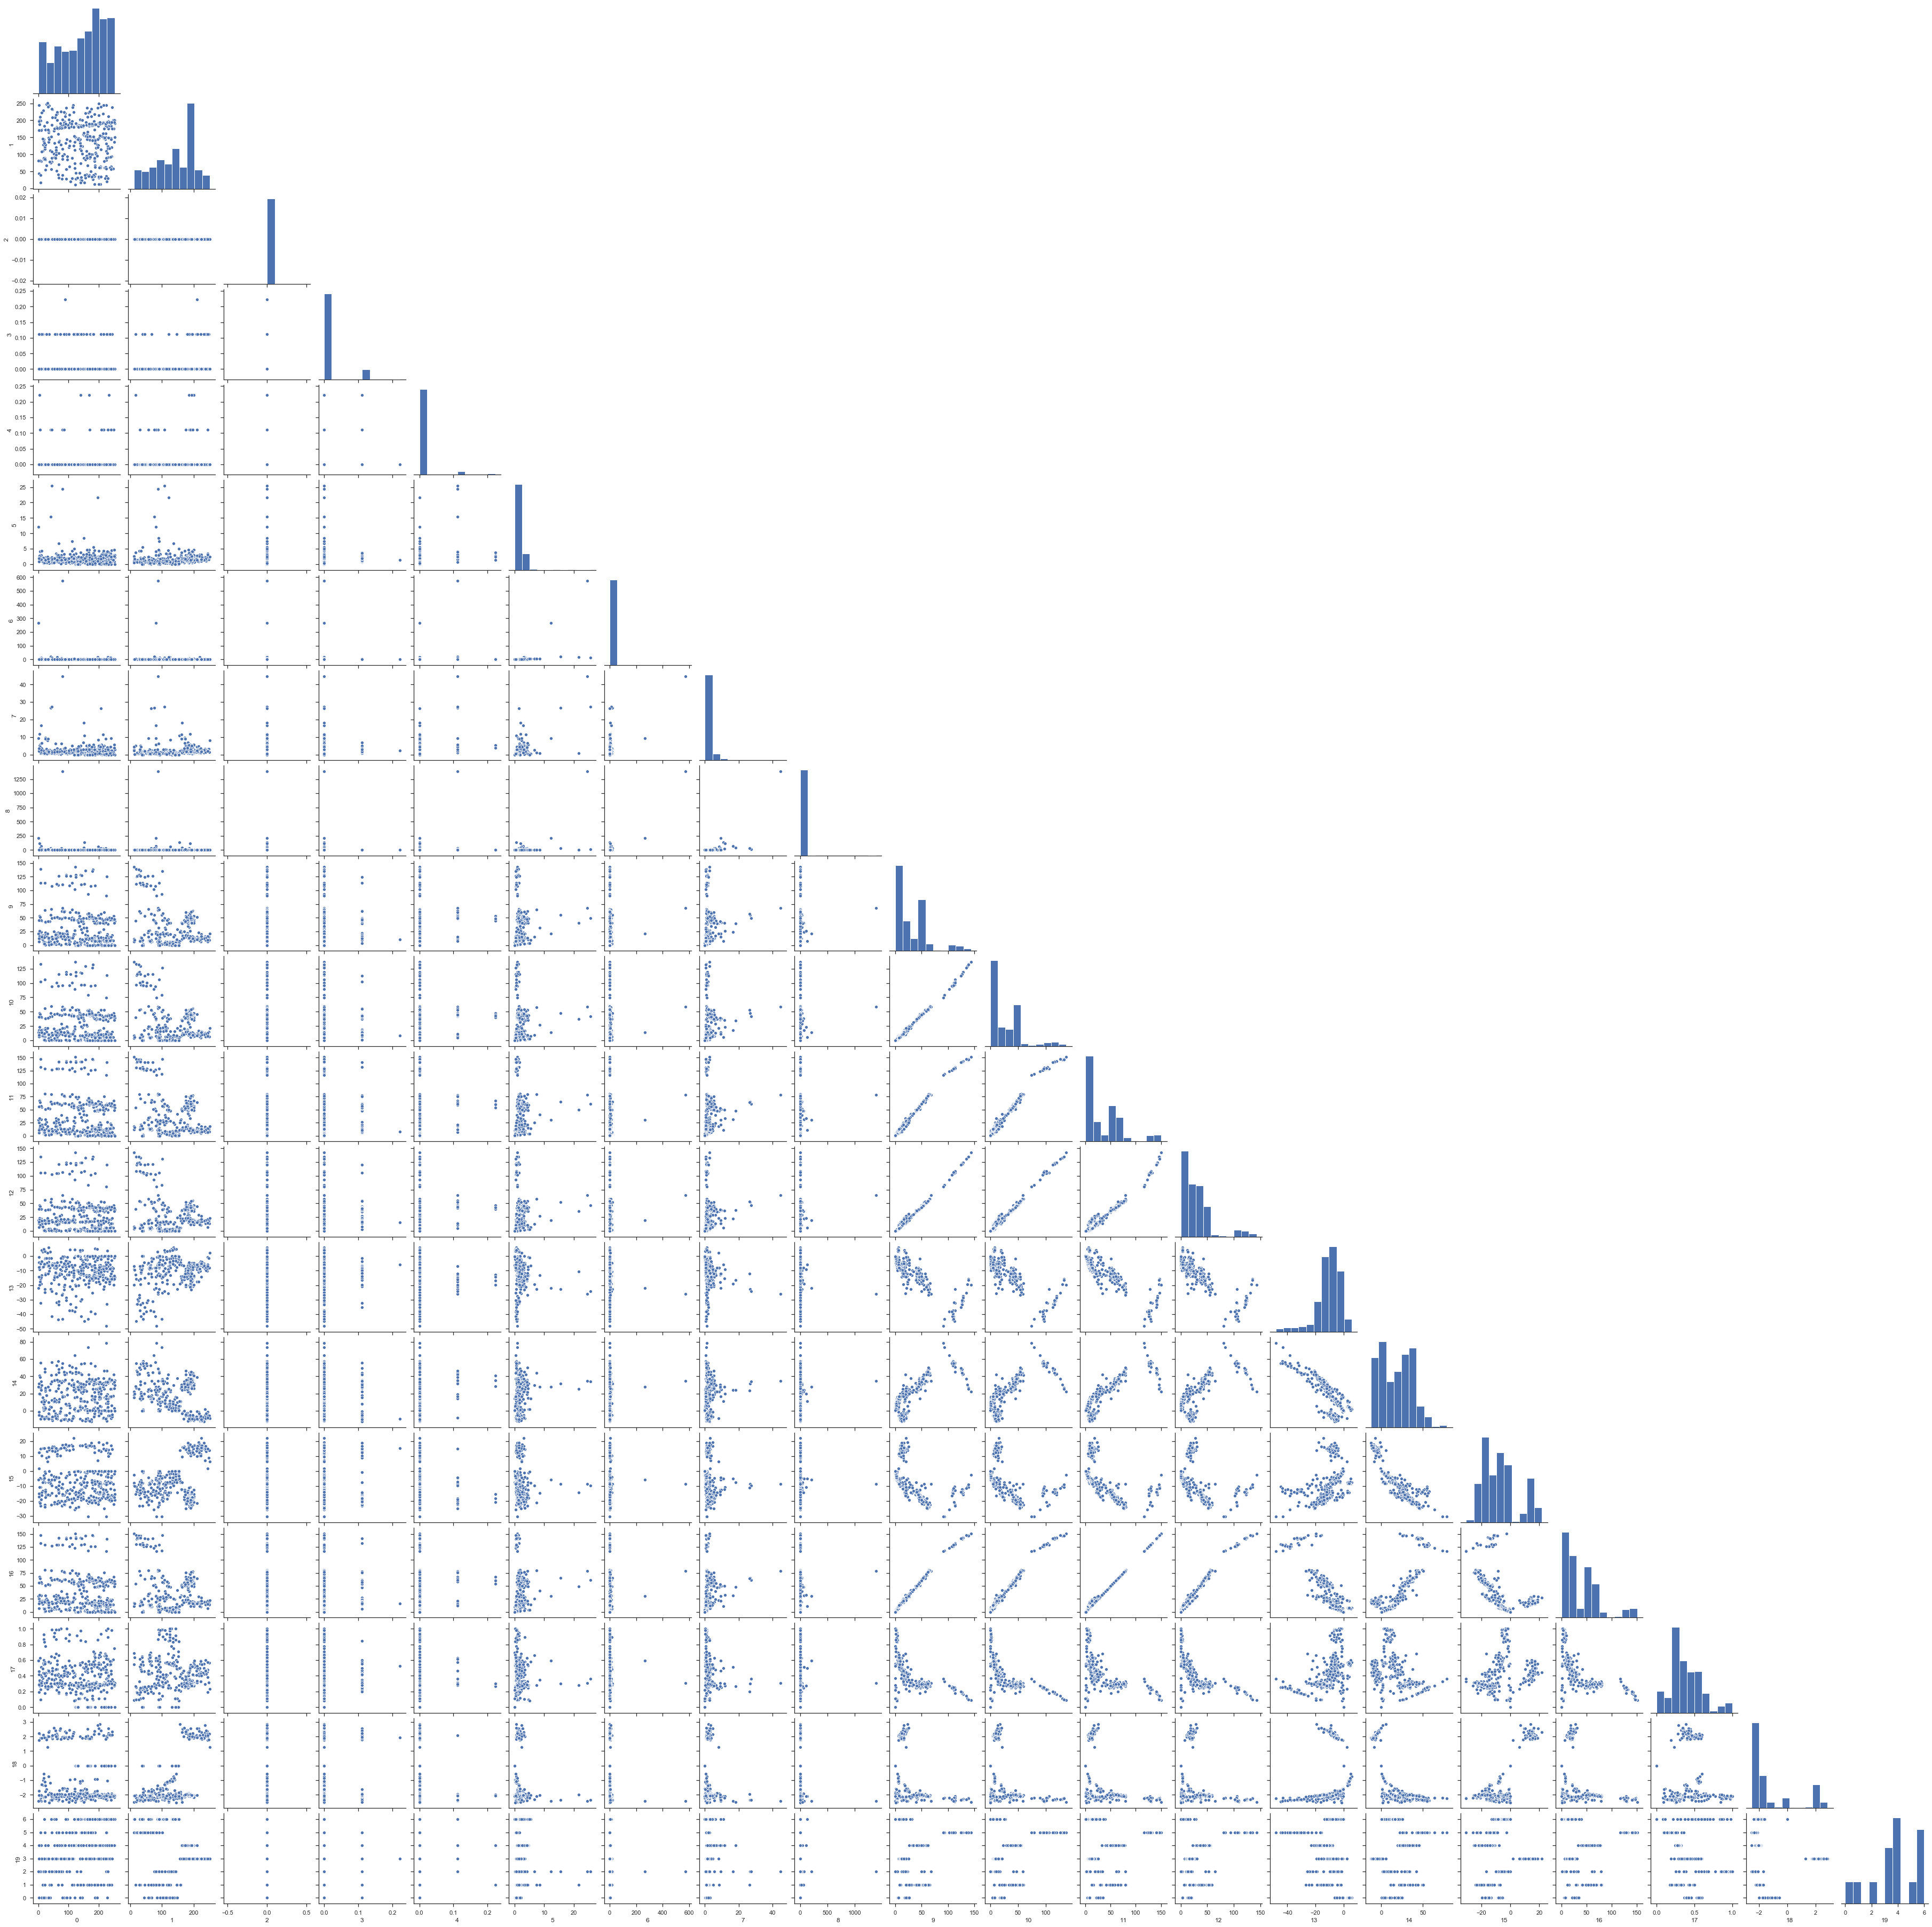

In [35]:
sns.set(style="ticks")

g = sns.pairplot(df2, corner = True)

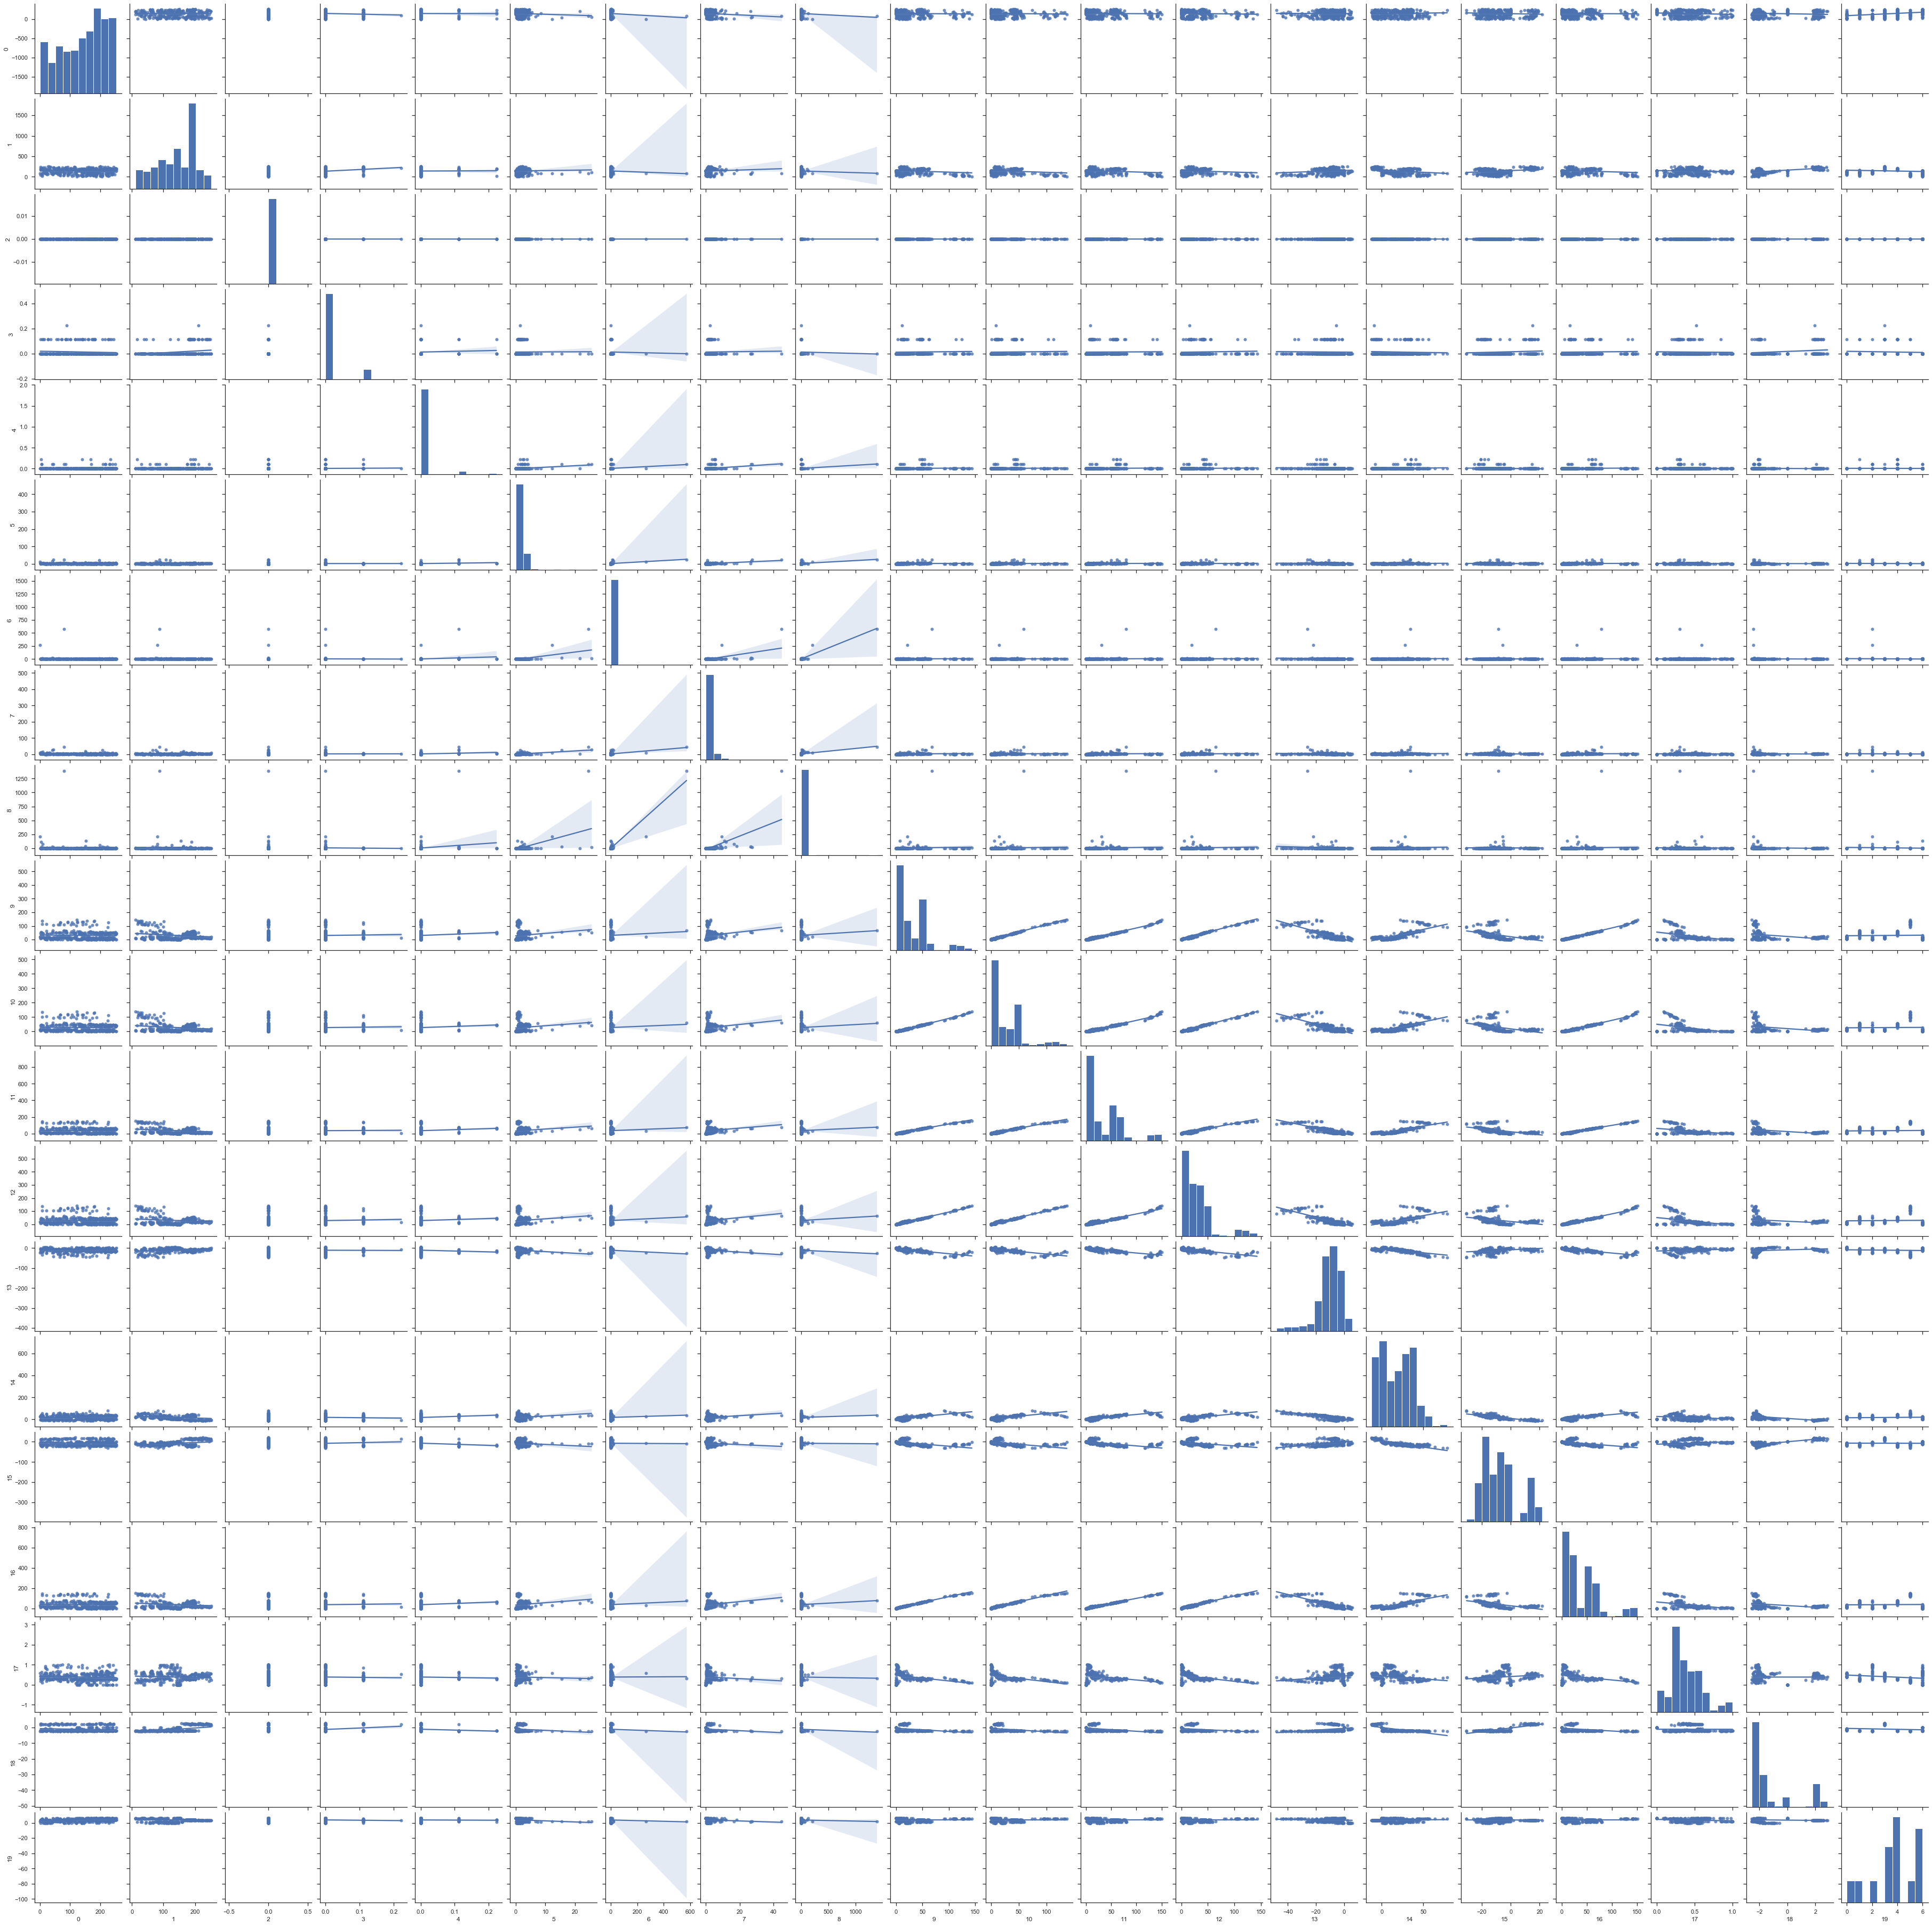

In [36]:
g = sns.pairplot(df2, kind = "reg")

# Algoritmos de Machine Learning

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [39]:
#Clasificadores con datos puros
#Separo todos los datos con las características y los resultados
X = np.array(df2.drop([numAttri1], 1))
y = np.array(df2[numAttri1])

In [ ]:
print("Ingresa la proporción del conjunto de datos (debe estar entre 0.0 y 1.0 )")
proporcion = input()
proporcion = float(proporcion)
#0.2

In [37]:
#Separo los datos de "train" en entrenamiento y prueba para testear los clasificadores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = proporcion)
deTr = format(X_train.shape[0])
deTe = format(X_test.shape[0])
print("Datos para Entrenamiento")
print(deTr)
print("Datos para prueba")
print(deTe)

Datos para Entrenamiento
387
Datos para prueba
97


In [57]:
#Separo los datos de "train" en entrenamiento y prueba para testear los clasificadores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = proporcion)
print("Datos para Entrenamiento = {} \nDatos para prueba = {}".format(X_train.shape[0], X_test.shape[0]))

Datos para Entrenamiento = 387 
Datos para prueba = 97


# K Vecinos más Cercanos

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

#Separo los datos de "train" en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = proporcion)

In [39]:
print("Número de vecinos a usar: ")
numV = input()
numV = int(numV)
#7

Número de vecinos a usar: 


 7


In [40]:
#Algoritmo
kvc = KNeighborsClassifier(n_neighbors = numV, metric = "minkowski")

In [41]:
print("Ingresa el número de pliegues: ")
pliegues = input()
pliegues = int(pliegues)
#10

Ingresa el número de pliegues: 


 10


In [42]:
score = cross_val_score(kvc, X, y, cv = pliegues, scoring = "accuracy")


C:\Users\afb19\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[ -6.49968736   4.53144843  -6.60883513  -6.62361953  11.26907966
  -6.89154421   4.12005765  -8.17814319  -6.70333272  11.08942584
  -6.53319839  -6.64004132  -6.51196361  -5.04594409  -5.17597583
  -6.88016121  -5.76226883  -5.96812998  -6.49294793  -5.16442589
  -6.68896057   4.28353939  -6.12989621  -8.28234534   3.83737386
  -7.0283445   -8.1229511   -7.67773979  -7.6214251    4.33418132
  -6.34717198  -6.44385213  -7.95145238  -6.24706723  -7.88786527
  -8.15117875  -6.31024766   4.26925991   4.08601617  -6.19772111
  -8.00912553   4.1792036    4.23564772   3.71812686   4.11945492
   4.20622244   4.17054532  -6.18855926   4.03481814   3.8604498
  -6.29608165   3.85181905   4.22983297  -6.26519285   3.76346342

In [48]:
#Lo Entreno
kvc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [49]:
#Predicción
y_pred = kvc.predict(X_test)
y_predE = kvc.predict(X_train)

In [50]:
predict = cross_val_predict(kvc, X, y, cv = pliegues)
matriz = confusion_matrix(y, predict)
print(matriz)

[[ 23   0   1   0   0   0   6]
 [  3  23   1   1   0   0   2]
 [  9   1  15   0   1   0   4]
 [  0   0   0  78   0   0   0]
 [  0   0   0   0 119   0   0]
 [  0   0   0   0   0  30   0]
 [  5   2   3   0   0   0  93]]


In [51]:
predicciones = []
for i in  predict:
    j = random.triangular(-.1,.1)
    j = round(j, 3)
    predicciones.append(i + j)

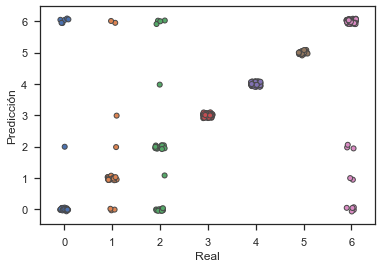

In [52]:
real = pd.DataFrame(data = y, columns = ["Real"])
clases = pd.DataFrame(data = y, columns = ["Clases"])
predecidas = pd.DataFrame(data = predicciones, columns = ["Predicción"])
finalDF = pd.concat([real, predecidas, clases], axis = 1)
#print(finalDF.head())

sb.stripplot(x = "Real", y = "Predicción", data = finalDF, jitter = .1, linewidth = 1)
plt.show()

In [53]:
print("Precisión K-Vecinos más Cercanos: ")
print(np.mean(score))

Precisión K-Vecinos más Cercanos: 
0.9071428571428571


In [54]:
#1

knn = KNeighborsClassifier(n_neighbors = 5)
score = cross_val_score(knn, X, y, cv = pliegues, scoring="accuracy")
print(np.mean(score))

#2
predict = cross_val_predict(knc, X, y, cv = pliegues)
matriz = confusion_matrix(y, predict)
print(matriz)

#3
import random
import decimal
predicciones = []
for i in  predict:
    j = random.triangular(-.1,.1)
    j = round(j, 3)
    predicciones.append(i + j)
    
#4
real = pd.DataFrame(data = y, columns=["Real"])
clases = pd.DataFrame(data = y, columns=["Clases"])
predecidas = pd.DataFrame(data = predicciones, columns=["Predicción"])
finalDF = pd.concat([real, predecidas, clases], axis=1)
print(finalDF.head())

import seaborn as sb
from matplotlib import pyplot as plt
sb.stripplot(x = "Real", y = "Predicción", data = finalDF, jitter = .1, linewidth = 1)
plt.show()


0.9071428571428571


NameError: name 'knc' is not defined

In [55]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizKV = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión - Prueba:")

print(matrizKV)

Matriz de Confusión - Prueba:
[[ 5  0  0  0  0  0  4]
 [ 2  4  0  0  0  0  2]
 [ 0  0  1  0  0  0  1]
 [ 0  0  0 19  0  0  0]
 [ 0  0  0  0 21  0  0]
 [ 0  0  0  0  0  5  0]
 [ 1  0  1  0  0  0 18]]


In [56]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizKV = confusion_matrix(y_train, y_predE)
print("Matriz de Confusión - Prueba:")

print(matrizKV)

Matriz de Confusión - Prueba:
[[14  0  2  0  0  0  5]
 [ 1 19  1  0  1  0  0]
 [ 5  1 19  0  1  0  2]
 [ 0  0  0 59  0  0  0]
 [ 0  0  0  0 98  0  0]
 [ 0  0  0  0  0 25  0]
 [ 3  1  2  0  0  0 77]]


In [57]:
df_confusion1 = pd.crosstab(y_test, y_pred)
df_confusion11 = pd.crosstab(y_train, y_predE)


In [58]:
df_confusion1 = pd.crosstab(y_test, y_pred, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion11 = pd.crosstab(y_train, y_predE, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)


In [59]:
df_conf_norm = df_confusion1 / df_confusion1.sum(axis = 1)
df_conf_norm11 = df_confusion11 / df_confusion1.sum(axis = 1)


In [60]:
def plot_confusion_matrix(df_confusion1, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion1, cmap=cmap) # imshow

    plt.colorbar()
    tick_marks = np.arange(len(df_confusion1.columns))
    plt.xticks(tick_marks, df_confusion1.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion1.index)

    plt.ylabel(df_confusion1.index.name)
    plt.xlabel(df_confusion1.columns.name)
    
def plot_confusion_matrix1(df_confusion11, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion11, cmap=cmap) # imshow

    plt.colorbar()
    tick_marks = np.arange(len(df_confusion11.columns))
    plt.xticks(tick_marks, df_confusion11.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion11.index)

    plt.ylabel(df_confusion11.index.name)
    plt.xlabel(df_confusion11.columns.name)


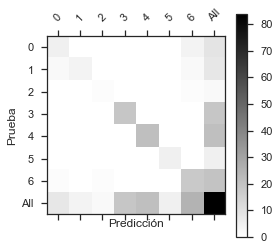

In [61]:
plot_confusion_matrix(df_confusion1)

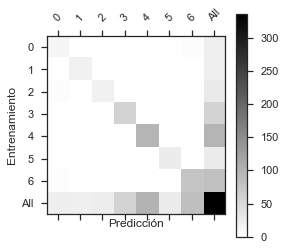

In [62]:
plot_confusion_matrix1(df_confusion11)

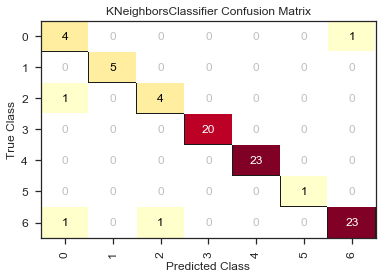

In [63]:
#EN VERIFICACIÓN

X = X1
y = y1
classes = range(0, int(NumClas))

X_train, X_test, y_train, y_test = tts(X, y, test_size = proporcion)

model = kvc

cm = ConfusionMatrix(model, classes = classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()

In [64]:
#Precisión Entrenamiento
preKVCE = format(kvc.score(X_test, y_test))
print("Precisión K-Vecinos más Cercanos: ")
print(preKVCE)

Precisión K-Vecinos más Cercanos: 
0.9523809523809523


In [65]:
#Precisión Prueba
preKVCP = format(kvc.score(X_test, y_test))
print("Precisión K-Vecinos más Cercanos: ")
print(preKVCP)

Precisión K-Vecinos más Cercanos: 
0.9523809523809523


In [66]:
#Validación Cruzada Entrenamiento
precisionKVCE = sklearn.model_selection.cross_val_score(estimator = kvc,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

print("Precisiones: {}".format(precisionKVCE))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionKVCE),
                                          np.std(precisionKVCE)))

Precisiones: [0.88235294 0.91176471 0.88235294 0.79411765 0.97058824 0.88235294
 0.87878788 0.90909091 0.87878788 0.84848485]
Precisión promedio:  0.884 +/-  0.043


In [67]:
#Validación Cruzada Prueba
precisionKVCP = sklearn.model_selection.cross_val_score(estimator=kvc,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}".format(precisionKVCP))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionKVCP),
                                          np.std(precisionKVCP)))

Precisiones: [0.83333333 0.73809524]
Precisión promedio:  0.786 +/-  0.048


C:\Users\afb19\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


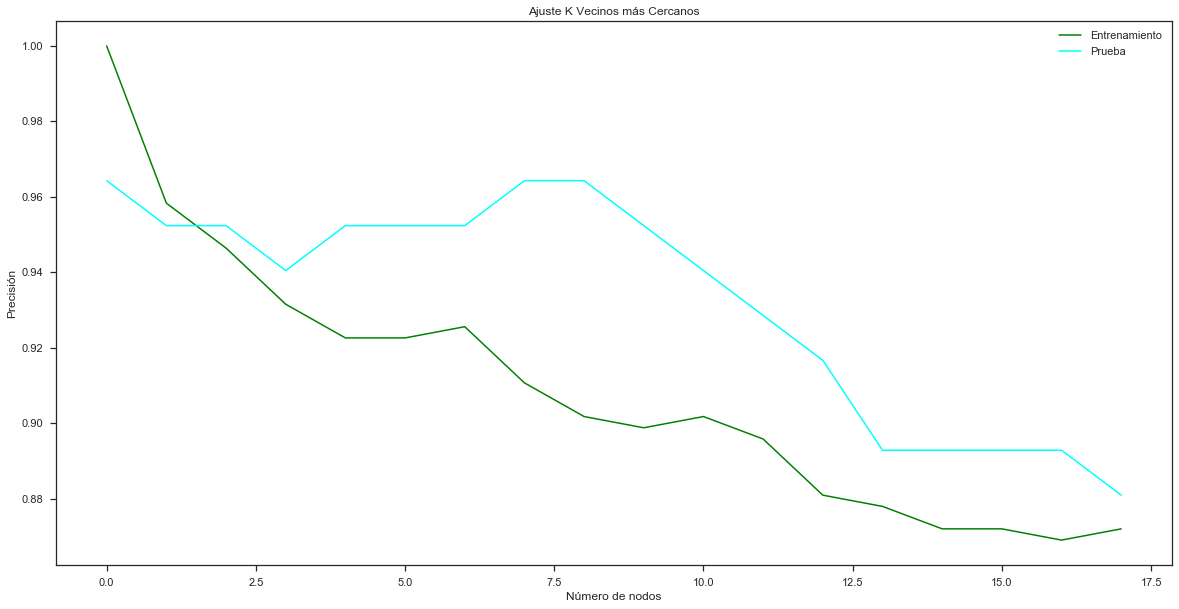

In [68]:
# Grafico de ajuste de K Vecinos más Cercanos
k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_prec.append(knn.score(X_train, y_train))
    eval_prec.append(knn.score(X_test, y_test))
    
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(train_prec, color="green", label="Entrenamiento")
plt.plot(eval_prec, color="cyan", label="Prueba")
plt.title("Ajuste K Vecinos más Cercanos")
plt.legend()
plt.xlabel("Número de nodos")
plt.ylabel("Precisión")
plt.show()

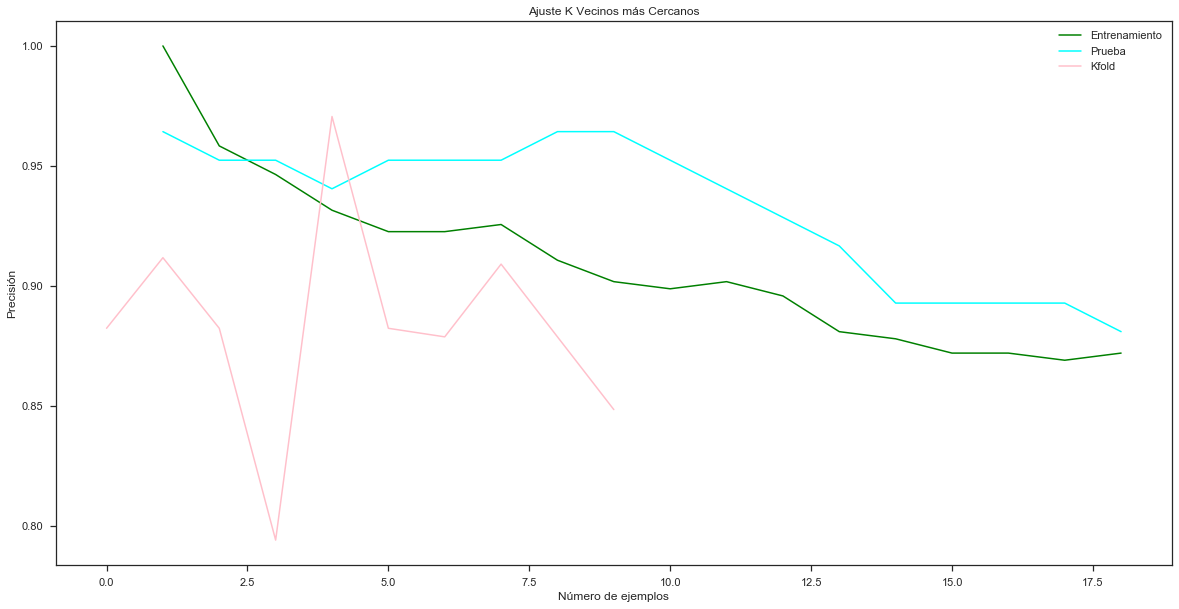

In [69]:
#Validación Cruzada Entrenamiento
precisionKVCE = sklearn.model_selection.cross_val_score(estimator = kvc,
                                            X = X_train, y = y_train,
#                                            cv=20, n_jobs=-1)                                                        
                                            cv = pliegues, n_jobs = -1)
# Grafico de ajuste de K Vecinos más Cercanos
k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_prec.append(knn.score(X_train, y_train))
    eval_prec.append(knn.score(X_test, y_test))
    
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots(figsize=(numAttri1, 10))
plt.plot(k_range, train_prec, color="green", label="Entrenamiento")
plt.plot(k_range, eval_prec, color="cyan", label="Prueba")
plt.plot(precisionKVCE, color="pink", label="Kfold")

plt.title("Ajuste K Vecinos más Cercanos")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()

In [70]:
#Precisión del modelo - Prueba
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       1.00      1.00      1.00         5
           2       0.67      0.40      0.50         5
           3       1.00      0.85      0.92        20
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00         1
           6       0.85      0.92      0.88        25

    accuracy                           0.88        84
   macro avg       0.84      0.82      0.82        84
weighted avg       0.90      0.88      0.88        84



In [71]:
#Precisión del modelo - Entrenamiento
pred = knn.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58        25
           1       0.94      0.64      0.76        25
           2       0.82      0.36      0.50        25
           3       0.97      0.97      0.97        58
           4       0.94      0.99      0.96        96
           5       1.00      1.00      1.00        29
           6       0.80      0.92      0.86        78

    accuracy                           0.87       336
   macro avg       0.86      0.79      0.80       336
weighted avg       0.88      0.87      0.86       336



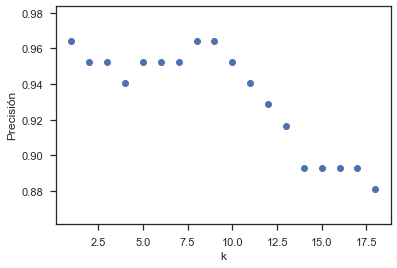

In [72]:
#Elegir el mejor valor de k
k_range = range(1, numAttri1)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel("k")
plt.ylabel("Precisión")
plt.scatter(k_range, scores)

In [73]:
# Ejemplo Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator = kvc,
                        X = X_train, y = y_train, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = pliegues,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

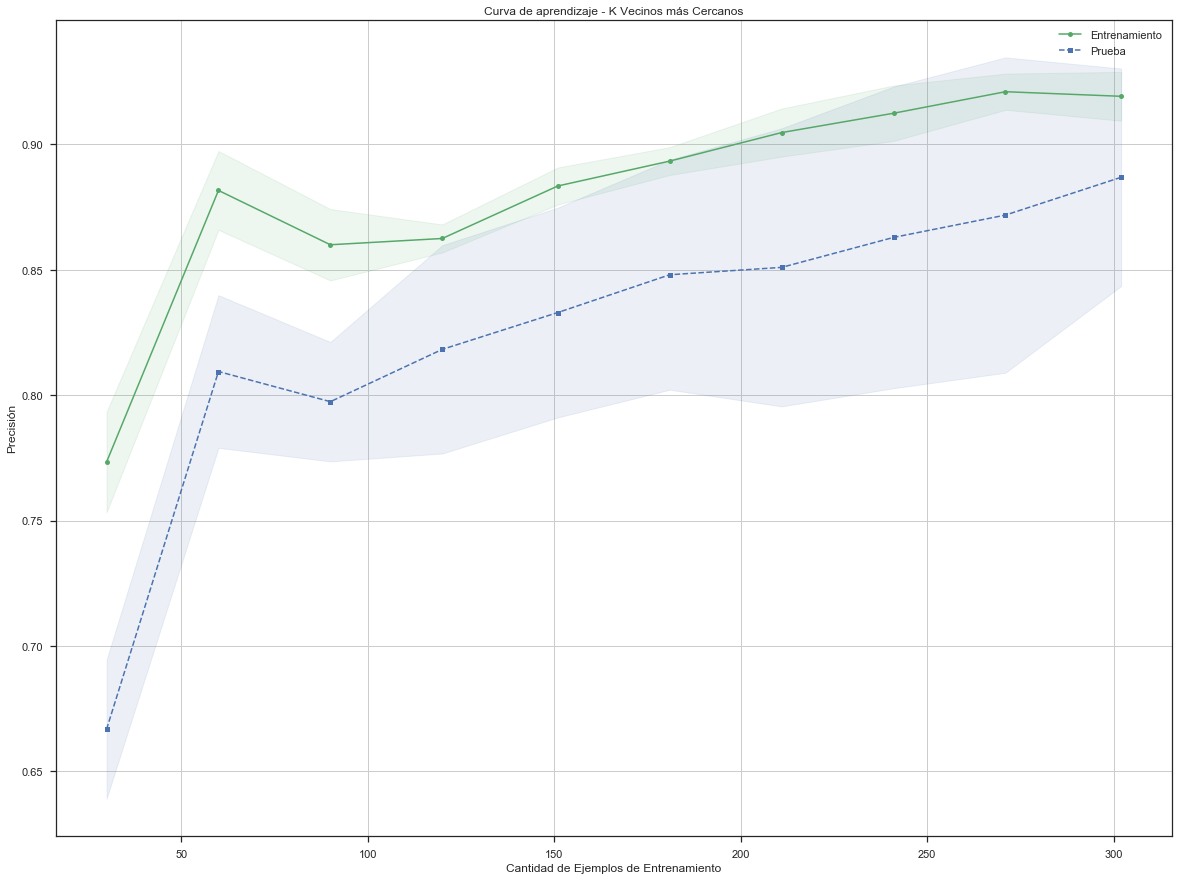

In [74]:
# Graficando las curvas
plt.subplots(figsize=(20, 15))
#plt.subplots(figsize=(numAttri1, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color = "g")
plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")
plt.grid()

plt.title("Curva de aprendizaje - K Vecinos más Cercanos")
plt.legend(loc = "best")
plt.xlabel("Cantidad de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()

# Navie Bayes

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

#Separo los datos de "train" en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = proporcion)

In [76]:
#Algoritmo
gnb = GaussianNB()

In [77]:
#Lo Entreno
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
#Predicción
y_pred2 = gnb.predict(X_test)
y_pred22 = gnb.predict(X_train)

In [79]:
cvp = cross_val_predict(kvc, X, y, cv = pliegues)
matriz = confusion_matrix(y, cvp)
print("Matriz de Confusión - Conjunto")
print(matriz)

Matriz de Confusión - Conjunto
[[ 23   0   1   0   0   0   6]
 [  3  23   1   1   0   0   2]
 [  9   1  15   0   1   0   4]
 [  0   0   0  78   0   0   0]
 [  0   0   0   0 119   0   0]
 [  0   0   0   0   0  30   0]
 [  5   2   3   0   0   0  93]]


In [80]:
predic = []
for f in  cvp:
    r = random.triangular(-.1,.1)
    r = round(r, 3)
    predic.append(f + r)

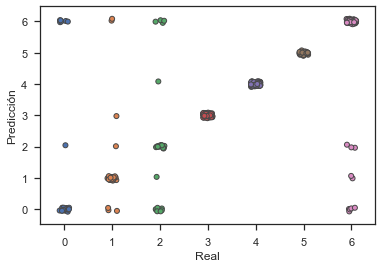

In [81]:
clas = pd.DataFrame(data = y, columns = ["Clases"])
real = pd.DataFrame(data = y, columns = ["Real"])
prede = pd.DataFrame(data = predic, columns = ["Predicción"])
concatenado = pd.concat([real, prede, clas], axis = 1)

sb.stripplot(x = "Real", y = "Predicción", data = concatenado, jitter = .1, linewidth = 1)
plt.show()

In [82]:
puntuación = cross_val_score(gnb, X, y, cv = pliegues, scoring = "accuracy")
print(np.mean(puntuación))

0.8499999999999999


In [83]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizGNB = confusion_matrix(y_test, y_pred2)
print("Matriz de Confusión - Prueba:")
print(matrizGNB)


Matriz de Confusión - Prueba:
[[ 8  0  0  0  0  0  0]
 [ 0  2  1  0  0  0  0]
 [ 1  0  1  0  0  0  5]
 [ 0  0  0 16  0  0  0]
 [ 0  3  2  0 23  0  0]
 [ 0  0  0  0  0  4  0]
 [ 2  0  0  0  0  0 16]]


In [84]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizGNB = confusion_matrix(y_train, y_pred22)
print("Matriz de Confusión - Entrenamiento:")
print(matrizGNB)

Matriz de Confusión - Entrenamiento:
[[21  1  0  0  0  0  0]
 [ 3 23  0  0  0  0  1]
 [ 1  0  8  0  0  0 14]
 [ 0  0  0 61  0  0  1]
 [ 0  4  1  0 86  0  0]
 [ 0  0  0  0  0 26  0]
 [ 3  3  4  0  0  0 75]]


In [85]:
df_confusion2 = pd.crosstab(y_test, y_pred2)
df_confusion22 = pd.crosstab(y_train, y_pred22)

In [86]:
df_confusion2 = pd.crosstab(y_test, y_pred2, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion22 = pd.crosstab(y_train, y_pred22, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)


In [87]:
df_conf_norm2 = df_confusion2 / df_confusion2.sum(axis = 1)
df_conf_norm22 = df_confusion22 / df_confusion22.sum(axis = 1)

In [88]:
def plot_confusion_matrix(df_confusion2, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion2, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion2.columns))
    plt.xticks(tick_marks, df_confusion2.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion2.index)
    plt.ylabel(df_confusion2.index.name)
    plt.xlabel(df_confusion2.columns.name)

def plot_confusion_matrix2(df_confusion22, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion22, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion22.columns))
    plt.xticks(tick_marks, df_confusion22.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion22.index)
    plt.ylabel(df_confusion22.index.name)
    plt.xlabel(df_confusion22.columns.name)

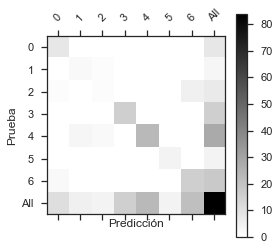

In [89]:
plot_confusion_matrix(df_confusion2)

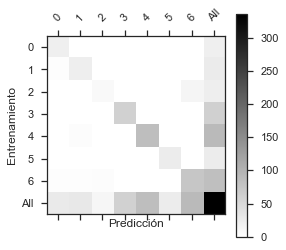

In [90]:
plot_confusion_matrix2(df_confusion22)

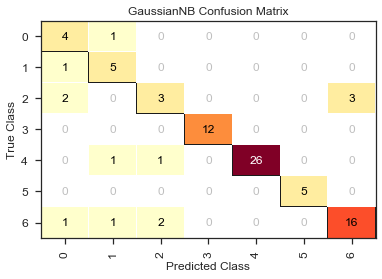

In [91]:
#EN VERIFICACIÓN

X = X1
y = y1
classes = range(0, int(NumClas))

X_train, X_test, y_train, y_test = tts(X, y, test_size = proporcion)

model = gnb

cm = ConfusionMatrix(model, classes = classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()

In [92]:
#Precisión Entrenamiento
preGNBE = format(gnb.score(X_train, y_train))
print("Precisión Navie Bayes=")
print(preGNBE)

Precisión Navie Bayes=
0.8898809523809523


In [93]:
#Precisión Prueba
preGNBP = format(gnb.score(X_test, y_test))
print("Precisión Navie Bayes=")
print(preGNBP)

Precisión Navie Bayes=
0.8452380952380952


In [94]:
#Validación Cruzada Entrenamiento
precision = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

print("Precisiones: {}".format(precision))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.67647059 0.88235294 0.82352941 0.88235294 0.85294118 0.91176471
 0.87878788 0.84848485 0.81818182 0.93939394]
Precisión promedio:  0.851 +/-  0.068


In [95]:
#Validación Cruzada Prueba
precision = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}".format(precision))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.5952381  0.66666667]
Precisión promedio:  0.631 +/-  0.036


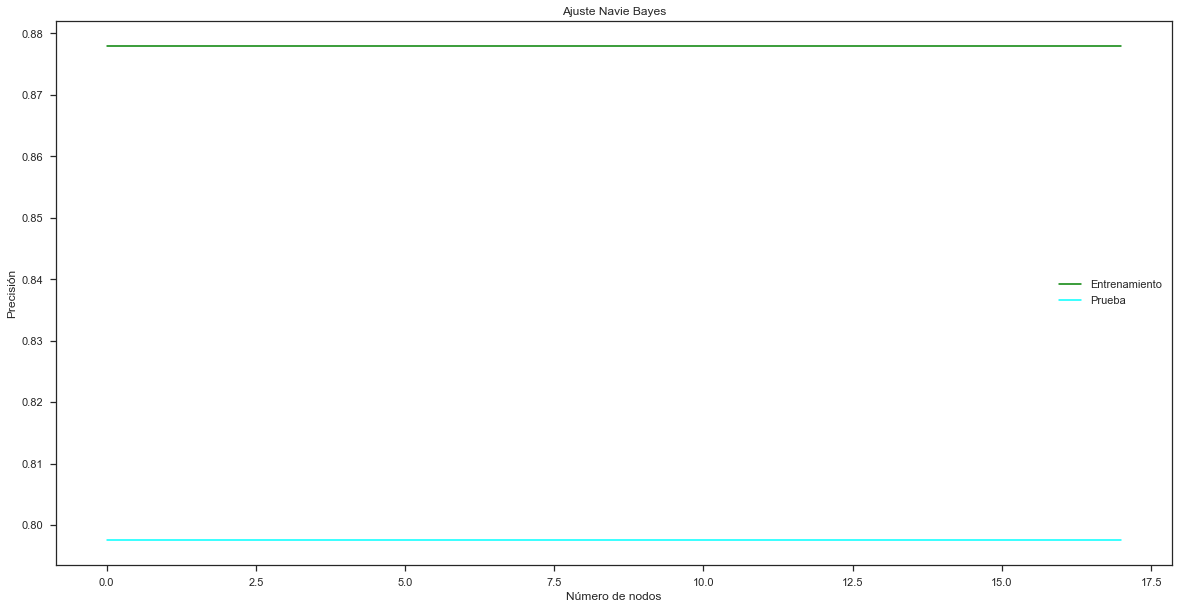

In [96]:
# Grafico de ajuste de K Vecinos más Cercanos
k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    gnb.fit(X_train, y_train)
    train_prec.append(gnb.score(X_train, y_train))
    eval_prec.append(gnb.score(X_test, y_test))
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(train_prec, color="green", label="Entrenamiento")
plt.plot(eval_prec, color="cyan", label="Prueba")
plt.title("Ajuste Navie Bayes")
plt.legend()
plt.xlabel("Número de nodos")
plt.ylabel("Precisión")
plt.show()

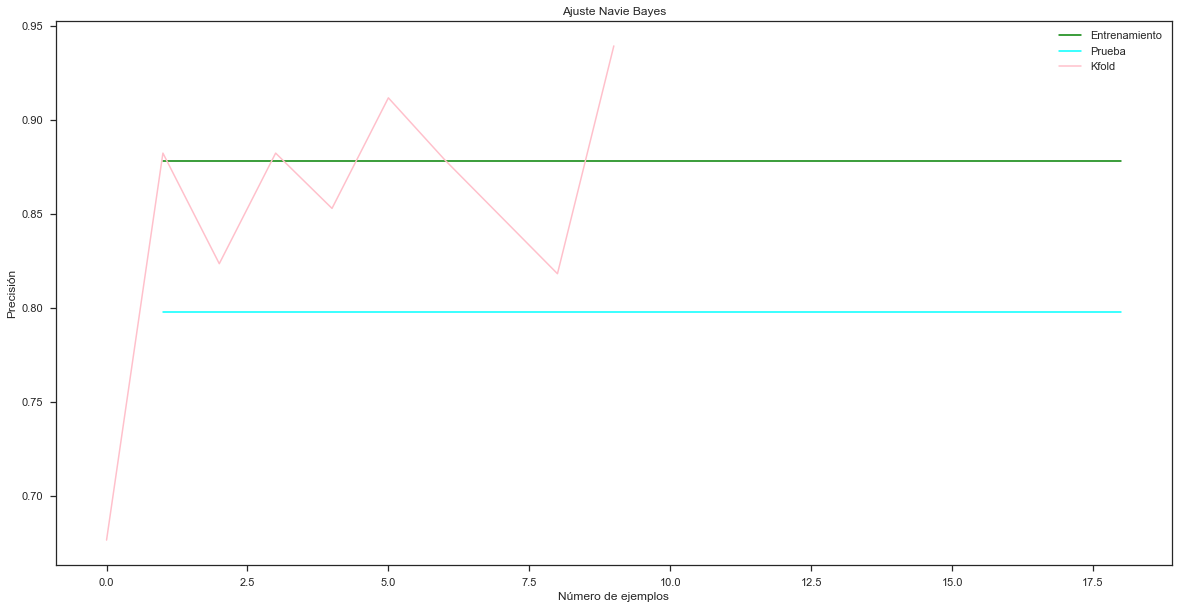

In [97]:
#Validación Cruzada Entrenamiento
precisionGNBE = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)                                                        
#                                            cv=20, n_jobs=-1)

# Grafico de ajuste de Navie Bayes
k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    gnb.fit(X_train, y_train)
    train_prec.append(gnb.score(X_train, y_train))
    eval_prec.append(gnb.score(X_test, y_test))
    #precision((X_test, y_test))
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots(figsize = (numAttri1, 10))
plt.plot(k_range, train_prec, color = "green", label = "Entrenamiento")
plt.plot(k_range, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionGNBE, color = "pink", label = "Kfold")

plt.title("Ajuste Navie Bayes")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()

In [98]:
#Precisión del modelo - Prueba
pred = gnb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.27      0.50      0.35         6
           2       0.60      0.38      0.46         8
           3       1.00      1.00      1.00        12
           4       0.96      0.89      0.93        28
           5       1.00      1.00      1.00         5
           6       0.84      0.80      0.82        20

    accuracy                           0.80        84
   macro avg       0.74      0.74      0.73        84
weighted avg       0.83      0.80      0.81        84



In [99]:
#Precisión del modelo - Entrenamiento
pred = gnb.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        25
           1       0.67      0.92      0.77        24
           2       0.56      0.23      0.32        22
           3       1.00      0.98      0.99        66
           4       1.00      0.90      0.95        91
           5       1.00      1.00      1.00        25
           6       0.81      0.86      0.83        83

    accuracy                           0.88       336
   macro avg       0.82      0.84      0.82       336
weighted avg       0.88      0.88      0.87       336



In [100]:
# Ejemplo Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator = gnb,
                        X = X_train, y = y_train, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = pliegues,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

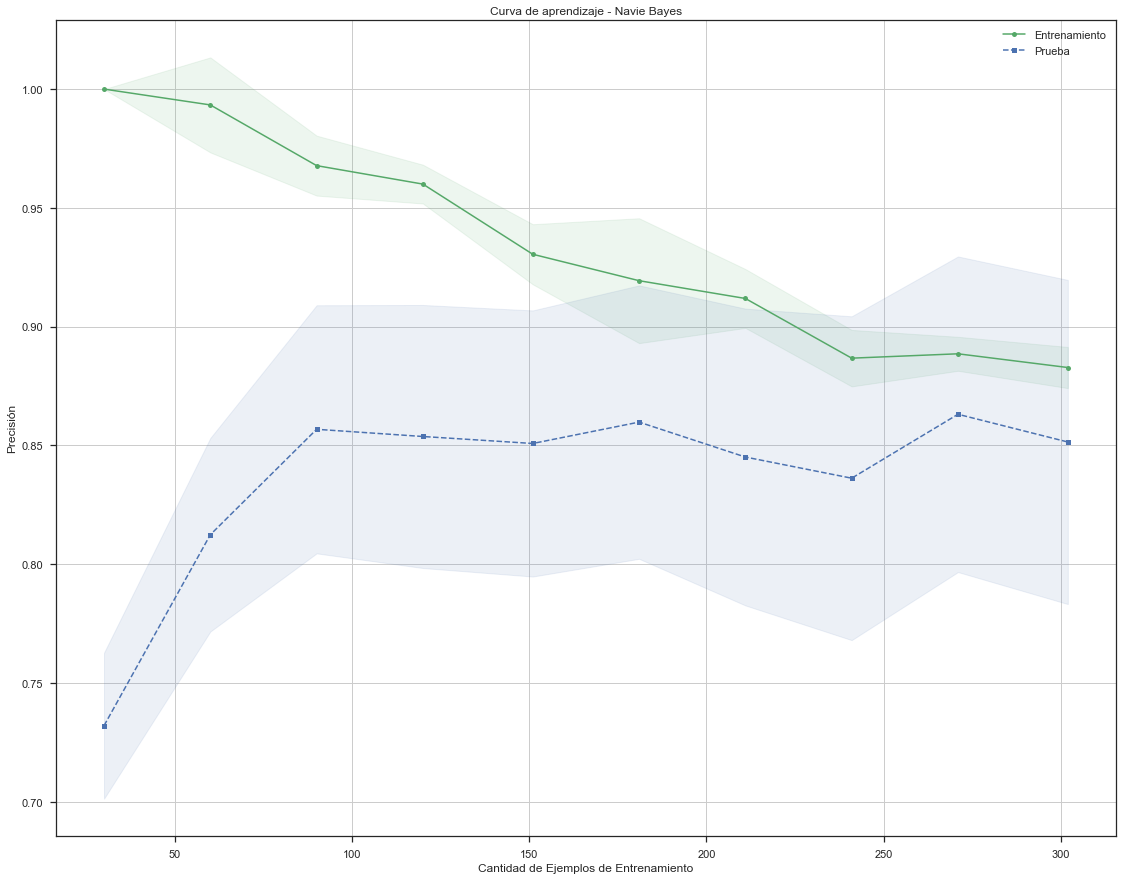

In [101]:
# Graficando las curvas
#plt.subplots(figsize=(20, 15))
plt.subplots(figsize = (numAttri1, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color = "g")
plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")
plt.grid()

plt.title("Curva de aprendizaje - Navie Bayes")
plt.legend(loc = "best")
plt.xlabel("Cantidad de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()

# Árboles de Decisión Clasificación

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import tree

#Separo los datos de "train" en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = proporcion)

In [103]:
print("Ingresa la profundidad máxima del árbol: ")
prof = input()
prof = int(prof)
#5

Ingresa la profundidad máxima del árbol: 


 5


In [105]:
print("Ingresa la función para medir la calidad de una división. Los criterios admitidos son 'gini' y 'entropy'.")
criterio = input()
"entropy"

Ingresa la función para medir la calidad de una división. Los criterios admitidos son 'gini' y 'entropy'.


 entropy


'entropy'

In [106]:
#Algoritmo
ad = DecisionTreeClassifier(criterion = criterio, max_depth = prof)#Profundidad

In [107]:
#Lo Entreno
ad.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
# Precisión del modelo en datos de entrenamiento(EJEMPLO).
print("Precisión entranamiento: {0: .2f}".format(
        ad.score(X_train, y_train)))

Precisión entranamiento:  0.98


In [109]:
#Predicción
y_pred3 = ad.predict(X_test)
y_pred33 = ad.predict(X_train)

In [110]:
predict = cross_val_predict(kvc, X, y, cv = pliegues)
matriz = confusion_matrix(y, predict)
print(matriz)

[[ 23   0   1   0   0   0   6]
 [  3  23   1   1   0   0   2]
 [  9   1  15   0   1   0   4]
 [  0   0   0  78   0   0   0]
 [  0   0   0   0 119   0   0]
 [  0   0   0   0   0  30   0]
 [  5   2   3   0   0   0  93]]


In [111]:
predicciones = []
for i in  predict:
    j = random.triangular(-.1,.1)
    j = round(j, 3)
    predicciones.append(i + j)

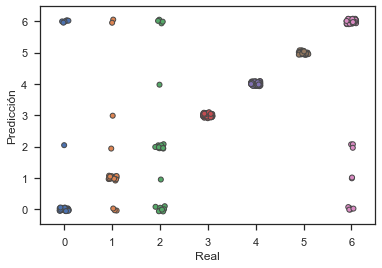

In [112]:
real = pd.DataFrame(data = y, columns = ["Real"])
clases = pd.DataFrame(data = y, columns = ["Clases"])
predecidas = pd.DataFrame(data = predicciones, columns = ["Predicción"])
finalDF = pd.concat([real, predecidas, clases], axis = 1)

sb.stripplot(x = "Real", y = "Predicción", data = finalDF, jitter = .1, linewidth = 1)

plt.show()


In [113]:
score = cross_val_score(ad, X, y, cv = pliegues, scoring = "accuracy")
print(np.mean(score))

0.9404761904761905


In [114]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizAD = confusion_matrix(y_test, y_pred3)
print("Matriz de Confusión - Prueba:")
print(matrizAD)

Matriz de Confusión - Prueba:
[[ 9  0  0  0  0  0  0]
 [ 0  3  0  1  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0  0 19  0  0]
 [ 0  0  0  0  0  7  0]
 [ 1  0  0  2  0  0 18]]


In [115]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó 
matrizAD = confusion_matrix(y_train, y_pred33)
print("Matriz de Confusión - Entrenamiento:")
print(matrizAD)

Matriz de Confusión - Entrenamiento:
[[ 21   0   0   0   0   0   0]
 [  1  22   0   0   0   0   3]
 [  1   0  26   0   0   0   1]
 [  0   0   0  56   0   0   0]
 [  0   0   0   0 100   0   0]
 [  0   0   0   0   0  23   0]
 [  1   0   1   0   0   0  80]]


In [116]:
df_confusion3 = pd.crosstab(y_test, y_pred3)
df_confusion33 = pd.crosstab(y_train, y_pred33)

In [117]:
df_confusion3 = pd.crosstab(y_test, y_pred3, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion33 = pd.crosstab(y_train, y_pred33, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)


In [118]:
df_conf_norm3 = df_confusion3 / df_confusion3.sum(axis = 1)
df_conf_norm33 = df_confusion33 / df_confusion33.sum(axis = 1)


In [119]:
def plot_confusion_matrix(df_confusion3, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion3, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion3.columns))
    plt.xticks(tick_marks, df_confusion3.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion3.index)
    plt.ylabel(df_confusion3.index.name)
    plt.xlabel(df_confusion3.columns.name)
    
def plot_confusion_matrix3(df_confusion33, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion33, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion33.columns))
    plt.xticks(tick_marks, df_confusion33.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion33.index)
    plt.ylabel(df_confusion33.index.name)
    plt.xlabel(df_confusion33.columns.name)


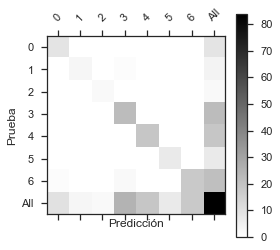

In [120]:
plot_confusion_matrix(df_confusion3)

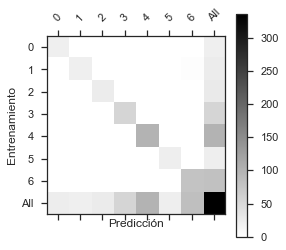

In [121]:
plot_confusion_matrix3(df_confusion33)

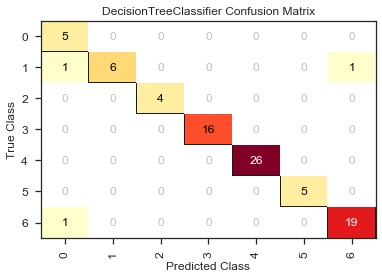

In [122]:
#EN VERIFICACIÓN

X = X1
y = y1
classes = range(0, int(NumClas))

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

model = ad

cm = ConfusionMatrix(model, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()

In [123]:
#Precisión Entrenamiento
#preADE = precision_score(y_train, y_pred, average="macro")#Ponderado
#print("Precisión Árbol de Decisión:")
#print(preAD)

In [124]:
#Precisión Prueba
preADP = precision_score(y_test, y_pred, average = "weighted")#Ponderado
print("Precisión Árbol de Decisión:")
print(preADP)

Precisión Árbol de Decisión:
0.18903210406969806


In [125]:
#Validación Cruzada Entrenamiento
precisionADE = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

print("Precisiones: {}".format(precisionADE))
print("Precision promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionADE),
                                          np.std(precisionADE)))

Precisiones: [0.94117647 0.97058824 0.94117647 0.94117647 0.88235294 0.88235294
 0.84848485 0.96969697 0.96969697 0.90909091]
Precision promedio:  0.926 +/-  0.041


In [126]:
#Validación Cruzada Prueba
precisionADP = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}".format(precisionADP))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionADP),
                                          np.std(precisionADP)))

Precisiones: [0.80952381 0.78571429]
Precisión promedio:  0.798 +/-  0.012


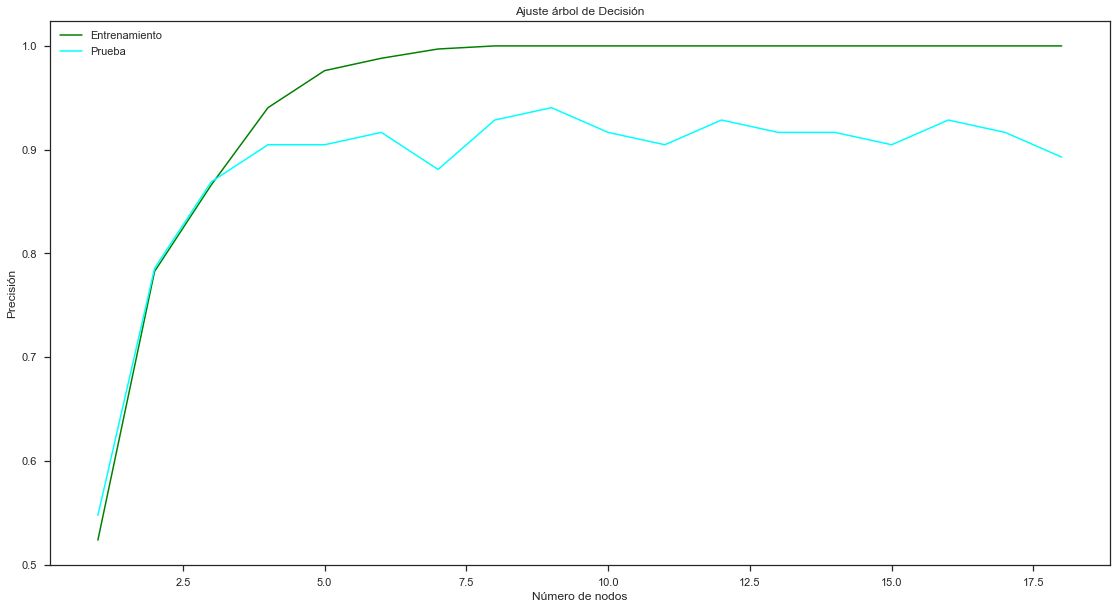

In [127]:
# Gráfico de ajuste del Árbol de Decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, numAttri1))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion = "entropy", max_depth = deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Resultados.
#fig, ax = plt.subplots(figsize=(20, 10))
fig, ax = plt.subplots(figsize = (numAttri1, 10))
plt.plot(max_deep_list, train_prec, color = "green", label = "Entrenamiento")
plt.plot(max_deep_list, eval_prec, color = "cyan", label = "Prueba")
plt.title("Ajuste árbol de Decisión")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de nodos")
plt.show()

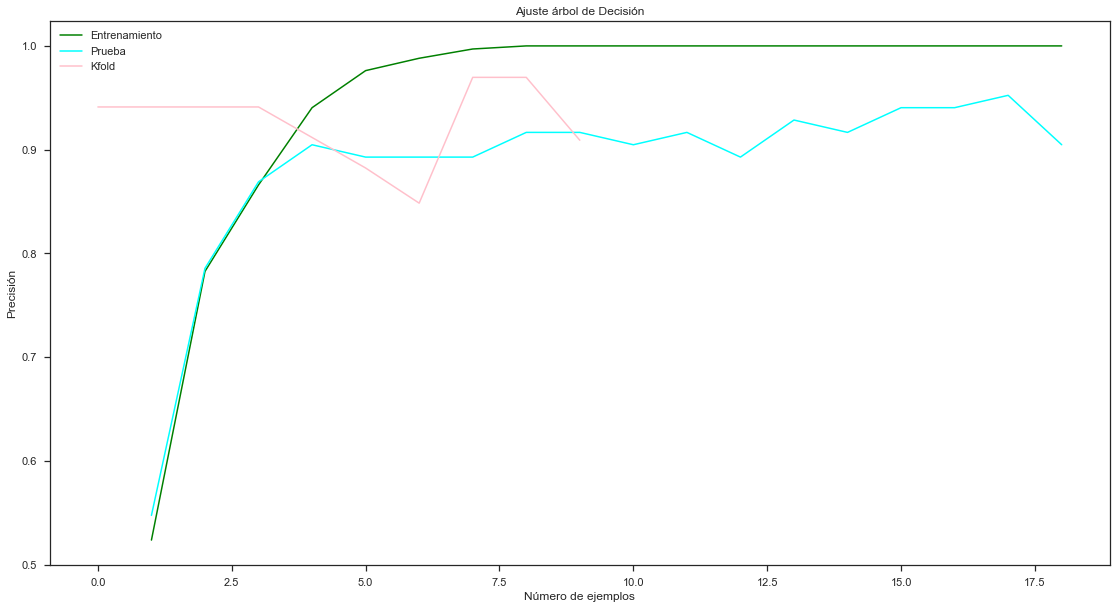

In [128]:
#Validación Cruzada Entrenamiento
precisionADP = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

# Gráfico de ajuste del Árbol de Decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, numAttri1))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion  = "entropy", max_depth = deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Resultados.
#fig, ax = plt.subplots(figsize=(20, 10))
fig, ax = plt.subplots(figsize = (numAttri1, 10))
plt.plot(max_deep_list, train_prec, color = "green", label = "Entrenamiento")
plt.plot(max_deep_list, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionADP, color = "pink", label = "Kfold")

plt.title("Ajuste árbol de Decisión")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()

In [129]:
#Precisión del modelo - Prueba
print("Prueba")
print(classification_report(y_test, y_pred3))

Prueba
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.08      0.12      0.10        16
           4       0.37      0.27      0.31        26
           5       0.29      0.40      0.33         5
           6       0.17      0.15      0.16        20

    accuracy                           0.17        84
   macro avg       0.13      0.13      0.13        84
weighted avg       0.19      0.17      0.17        84



In [130]:
#Precisión del modelo - Entrenamiento
print("Entrenamiento")
print(classification_report(y_train, y_pred33))

Entrenamiento
              precision    recall  f1-score   support

           0       0.17      0.16      0.16        25
           1       0.05      0.05      0.05        22
           2       0.15      0.15      0.15        26
           3       0.12      0.11      0.12        62
           4       0.39      0.42      0.40        93
           5       0.04      0.04      0.04        25
           6       0.32      0.33      0.32        83

    accuracy                           0.25       336
   macro avg       0.18      0.18      0.18       336
weighted avg       0.24      0.25      0.24       336



In [131]:
# Ejemplo Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator = ad,
                        X = X_train, y = y_train, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = pliegues,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

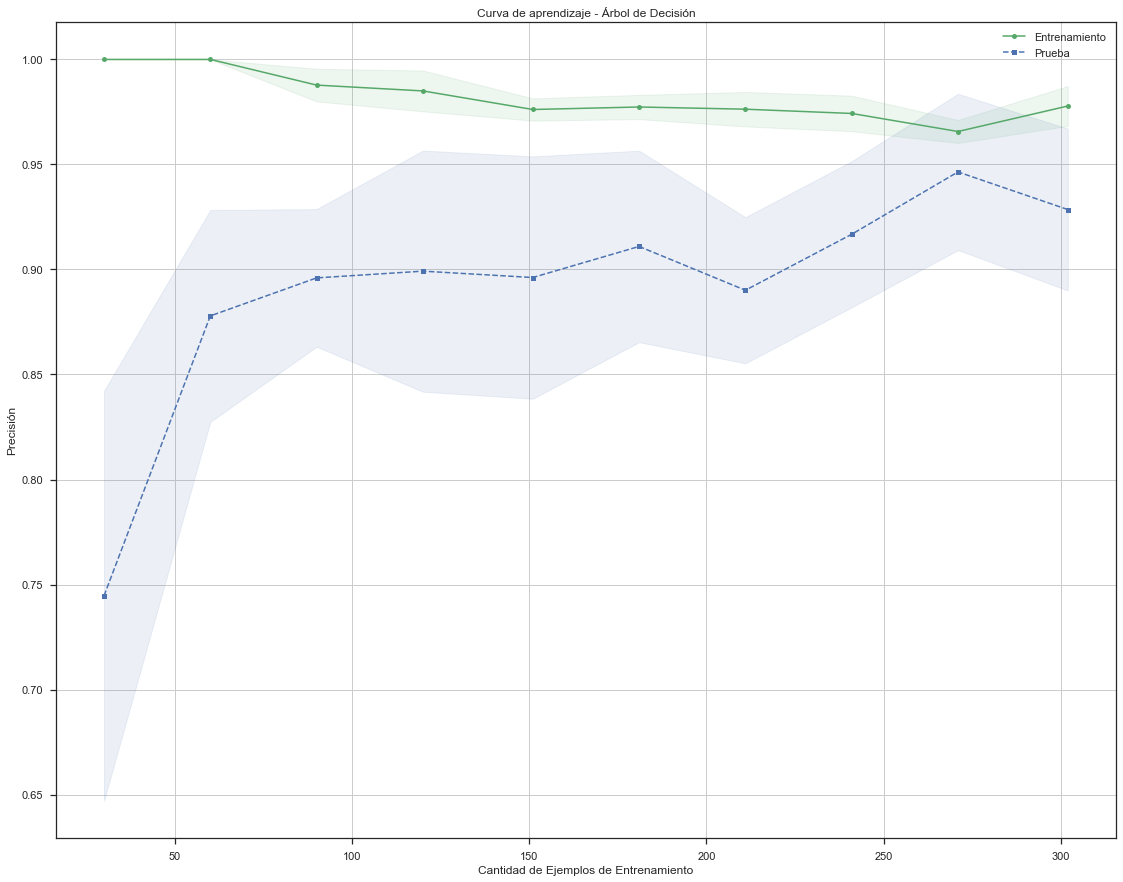

In [132]:
# Graficando las curvas
plt.subplots(figsize = (numAttri1, 15))
#plt.subplots(figsize=(20, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color='g')
plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")
plt.grid()

plt.title("Curva de aprendizaje - Árbol de Decisión")
plt.legend(loc = "best")
plt.xlabel("Cantidad de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()

In [133]:
ad.tree_.max_depth


5

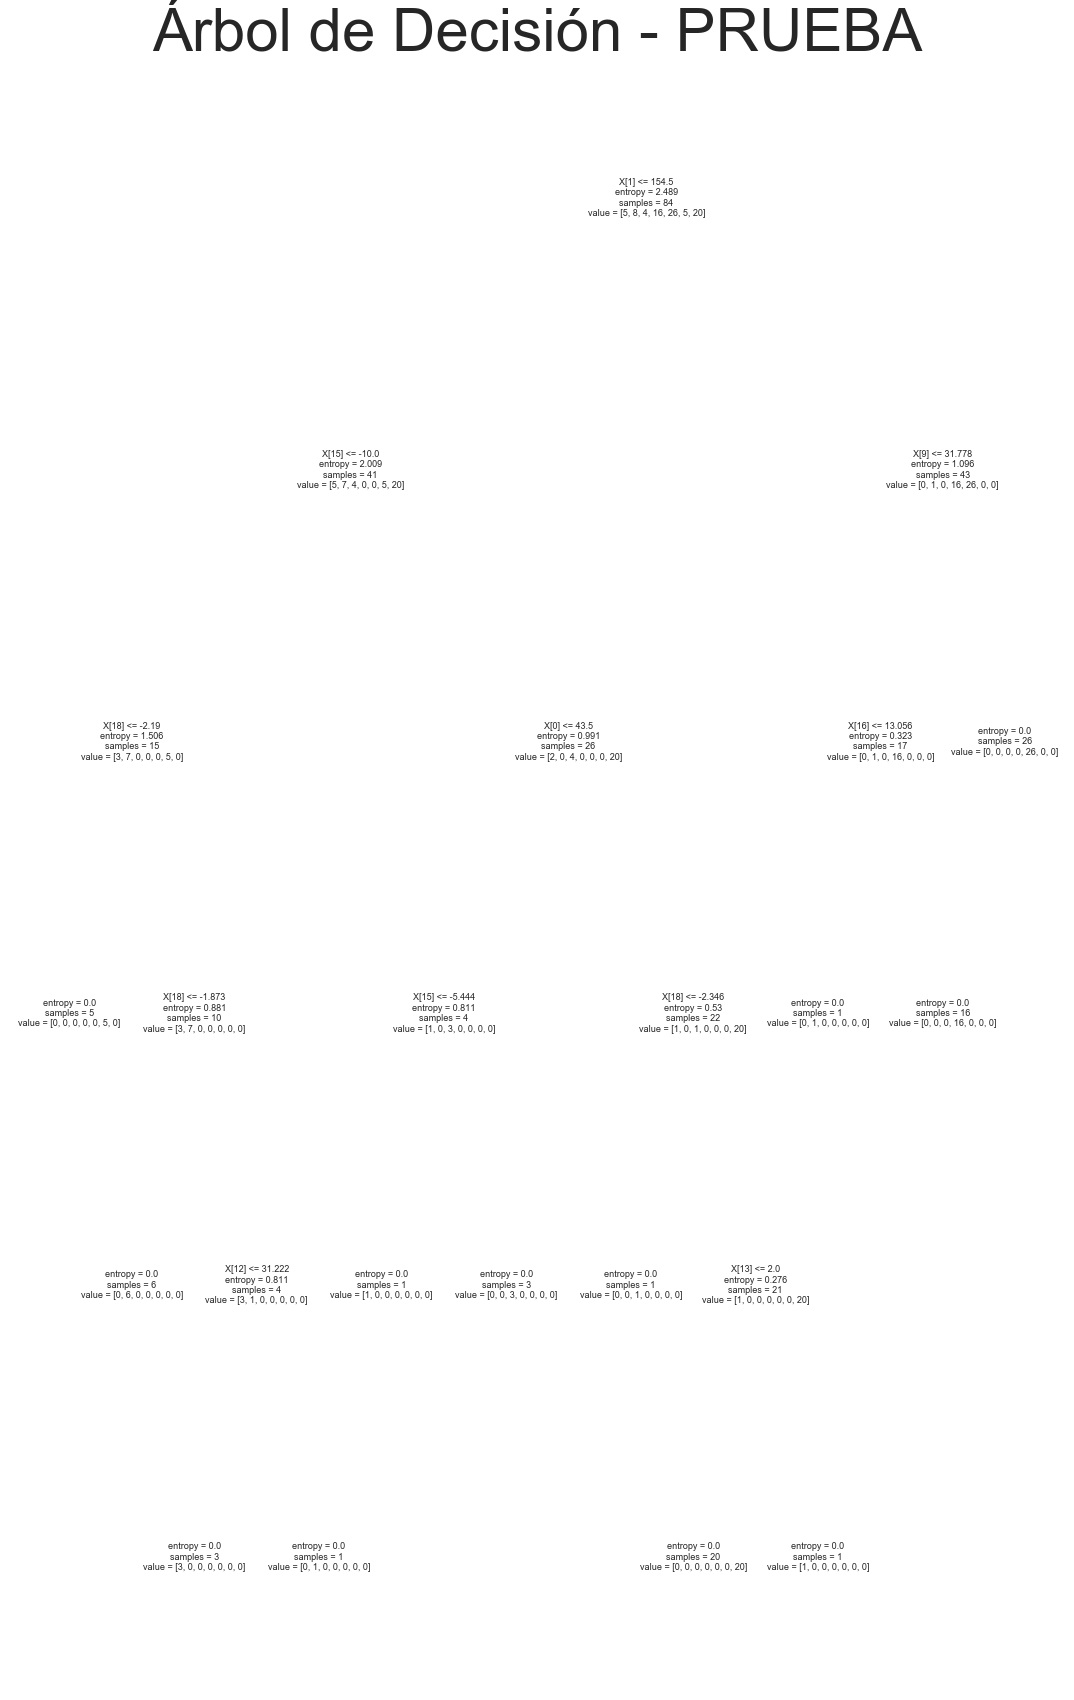

In [134]:
fig, ax = plt.subplots(figsize = (numAttri1, 30))
#fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(ad.fit(X_test, y_test)) 
plt.title("Árbol de Decisión - PRUEBA", fontsize=60)
plt.show()

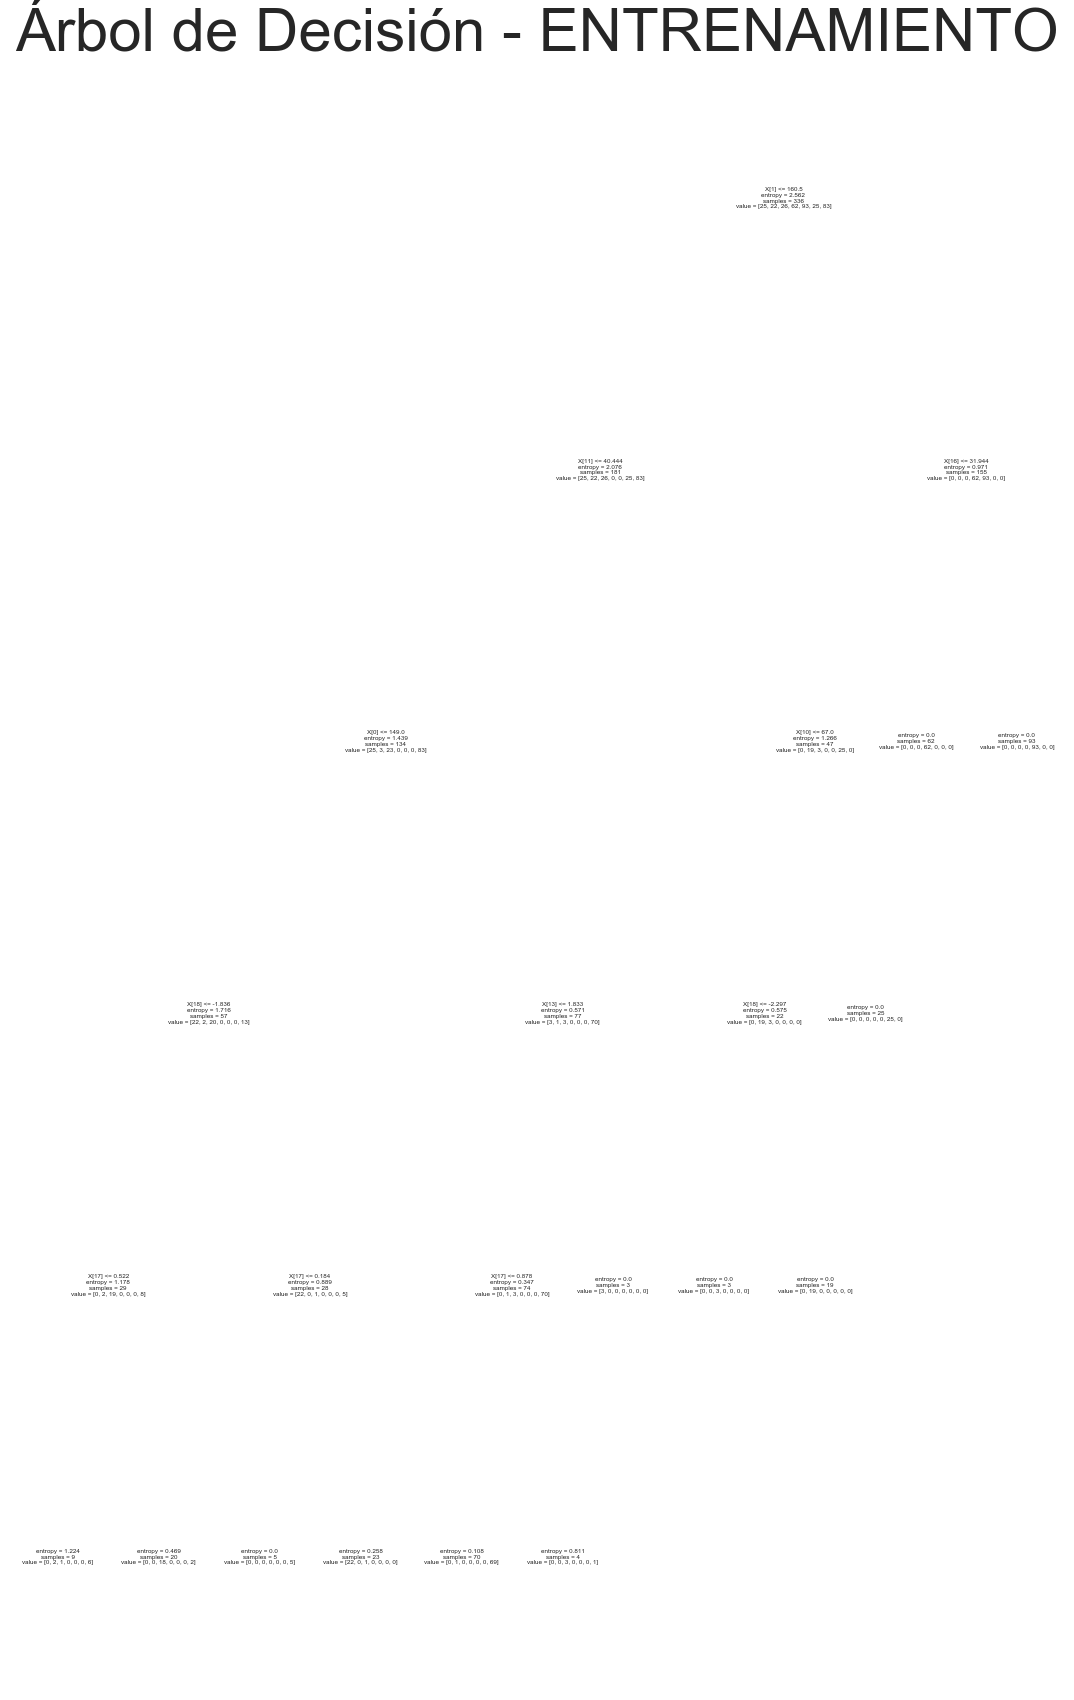

In [135]:
fig, ax = plt.subplots(figsize = (numAttri1, 30))
#fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(ad.fit(X_train, y_train)) 
plt.title("Árbol de Decisión - ENTRENAMIENTO", fontsize = 60)
plt.show()


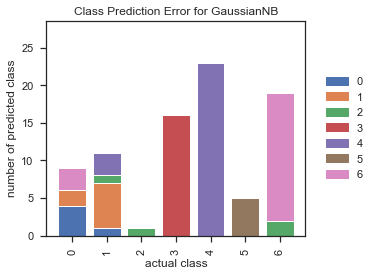

In [136]:
# Crear conjunto de datos de clasificación

classes = range(0, int(NumClas))

# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    gnb, classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()


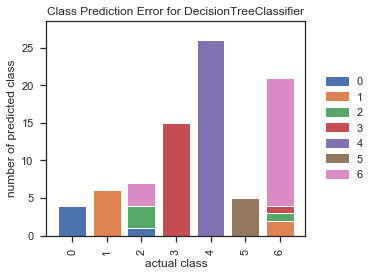

In [137]:
# Crear conjunto de datos de clasificación
classes = range(0, int(NumClas))

# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    ad, classes=classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()


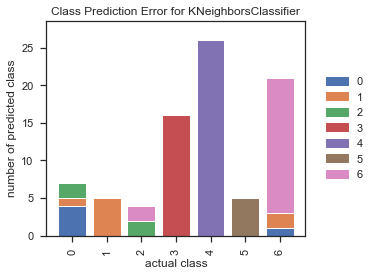

In [138]:
# Crear conjunto de datos de clasificación
classes = range(0, int(NumClas))

# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    kvc, classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()
 

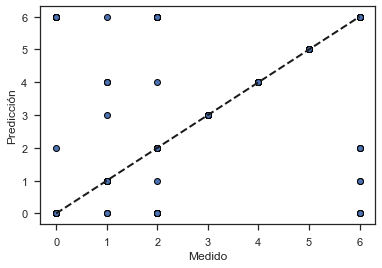

In [142]:
X2 = df2.iloc[:, 0:numAttri1].values
y2 = df2.iloc[:, numAttri1].values

lr = KNeighborsClassifier(n_neighbors = 10)
X =df2.iloc[:, 0:19].values
y = df2.iloc[:, 19].values

# cross_val_predict devuelve una matriz del mismo tamaño que `y` donde cada entrada
# es una predicción obtenida por validación cruzada:
predicted = cross_val_predict(lr, X, y, cv = 6)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 2)
ax.set_xlabel('Medido')
ax.set_ylabel('Predicción')
plt.show()
